# DATA

# CO CALIBRATION

In [114]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [115]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
#Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
#Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.sample(frac=1)

In [116]:
CO_Data=CO_Data.resample('20min').mean()
CO_Data=CO_Data.dropna()
CO_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,
2019-10-02 11:40:00,3571.592599,26.378438,58.063437,312.707200,984.426875,10.0,2.0,2.0,11.0
2019-10-02 12:00:00,3108.940622,25.632544,48.527009,188.164925,900.879534,10.0,2.0,2.0,12.0
2019-10-02 12:20:00,2614.641410,25.811435,53.792695,269.273025,746.248697,10.0,2.0,2.0,12.0
2019-10-02 15:40:00,3313.026561,30.623188,49.580620,259.460975,914.638179,10.0,2.0,2.0,15.0
2019-10-03 15:40:00,535.086842,29.421250,52.411845,341.897275,152.440810,10.0,3.0,3.0,15.0


In [117]:
#Ref=CO_Data['Ref'].to_list()
#CO_Data=CO_Data[CO_Data.Ref.between(np.mean(Ref)-0.7*np.std(Ref), np.mean(Ref)+0.7*np.std(Ref))]
#CO_Data.shape

In [118]:
sub= str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

In [119]:
print('O2'.translate(sub))

O₂


In [120]:
print(r'$O_{2}$')

$O_{2}$


# Outlier detection and removal

In [121]:
import numpy as np

import pandas as pd   
import seaborn as sns
from scipy import stats

((11151, 9), (11610, 9))

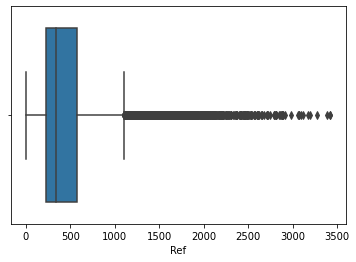

In [122]:
sns.boxplot(x=CO_Data['Ref'])
z=np.abs(stats.zscore(CO_Data))
CO_data=CO_Data[(z < 3).all(axis=1)]
CO_data.shape,CO_Data.shape

In [123]:
def MBE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    mbe=np.mean(true-pred)
    return mbe
def CRMSE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    crmse=np.sqrt(np.mean(((true-np.mean(true))-(pred-np.mean(pred)))**2))
    if np.std(pred)>np.std(true):
        crmse=crmse
    else:
        crmse=-crmse
    return crmse
import random

# Relative Expanded  Uncertainty(REU)

In [124]:
def REF(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=np.maximum(prec,0.001*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/cal)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [125]:
def REF10(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=np.maximum(prec,0.001*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P2=u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=np.sqrt(np.array(P))
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal 

In [126]:
def REF2(pred,y_test,alpha,LV):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    for i in range(len(ref)):
        if ref[i]==0:
            ref[i]=ref_mean
    prec=np.array([20 for i in range(len(ref))])
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
    P3=(Beta_0+(Beta_1-1)*LV)**2
    P=P1+P2+P3
    if P<0:
        P=random.randint(1,100)
    u_cal=(2*np.sqrt(P)/(Beta_0+Beta_1*LV))*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*0.1+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [127]:
def target(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=np.maximum(prec, 0.001*ref)
    #u=0.01*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)
    P=[]
    for i in range(len(P2)):
        P.append(P1+P2[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,50)
    A=(2*(np.array(P))**0.5/ref)*100
    #for i in range(len(P3)):
        #if P3[i]<0:
            #P3[i]=random.randint(0,50)
    B=(2*(np.array(P3))/ref)*100
    bias=[]
    random=[]
    Ref=[]
    part1=(Beta_0/ref)*100
    part=[beta_1-1 for i in range(len(ref))]
    part2=(np.array(part))*100
    PART1=[]
    PART2=[]
    for i in range(len(A)):
        if A[i]<500:
            random.append(A[i])
            bias.append(B[i])
            Ref.append(ref[i])
            PART1.append(part1[i])
            PART2.append(part2[i])
    return [random,bias,Ref, PART1,PART2]

from sklearn import linear_model
import numpy as np
Y=[20,40,60,80,100]
X=np.array([10,30,50,70,90]).reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

def target2(Y,X,u):
    from sklearn import linear_model
    import numpy as np
    x=np.array(Y).reshape(-1, 1)
    y=np.array(X).reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    b0=regr.intercept_
    b1=regr.coef_[0]
    RSS=sum((np.array(Y)-(b0[0]+b1[0]*np.array(X)))**2)
    RR=2*((RSS/((len(X)-2))-u**2)/np.array(X))**0.5
    RB=2*(b0/np.array(X)+(b1-1))
    return RR,RB

A=[200,360,288,290]
B=[204,336,267,301]
y=np.array(B).reshape(-1, 1)
RSS=sum((np.array(A)-(b0[0]+b1[0]*np.array(B)))**2)
RSS
RR=2*((RSS/((len(X)-2))-5**2)/np.array(X))**0.5
RR

x=np.array(A).reshape(-1, 1)
y=np.array(B).reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
b0=regr.intercept_
b1=regr.coef_[0]
b0[0]
b1[0]

target2(A,B,5)

B=np.array([20,20])
A=np.array([1,30])
C=np.array([A,B])
np.maximum(A,B)

In [128]:
#Ref=CO_Data['Ref'].to_list()
#CO_Data=CO_Data[CO_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#NO2_Data.shape

## Model 1: Linear Regression

In [129]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'

X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2)
#train_test_split(X, y, test_size = 0.2)

In [130]:
lr = LinearRegression()
model = lr.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = model.predict(X_test.drop(['Lab1'], axis=1))
lab1=X_test['Lab1'].to_list()

index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_CO=sMAPE_lr
RMSE_lr_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_lr_CO=Pearson_lr
sMAPE_lab_CO=sMAPE_lab
RMSE_lab_CO=round(RMSE_lab/np.mean(np.array(lab1)),2)
Pearson_lab_CO=Pearson_lab
R2_lr_CO=round(sm.r2_score(y_test, pred), 2)
R2_lab_CO=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_CO=RMSE_lr
RMSE_Lab_CO=RMSE_lab

A=len(y_test)-200
D=max(y_test[A:])-0.2*max(y_test[A:])
C=max(y_test[A:])-0.1*max(y_test[A:])
B=120
Pearson_lr,RMSE_Lr_CO

(0.93, 154.3)

In [131]:
cal=np.array(pred)
ref=np.array(y_test.to_list())
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
    #cal=np.log(cal)
    #ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+1)*(0.08*ref)**2)
du_s=RSS/(len(cal)-2)
Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P1

15906.061700278135

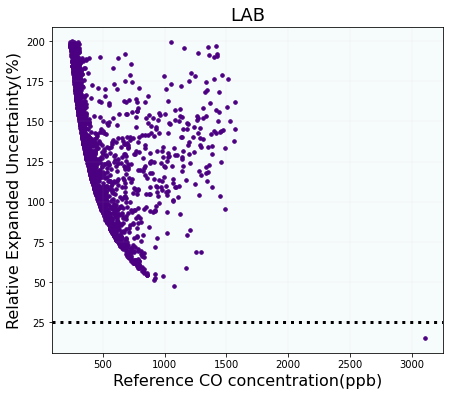

In [132]:
u_cal=REF(lab1,y_test,0.1)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(pred)):
    if u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(Lab1[i])

dqo=[25 for i in range(len(Ref))]
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
#plt.ylabel(r'$H_{2}$', fontsize=24)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LAB',fontsize=18)
plt.show()

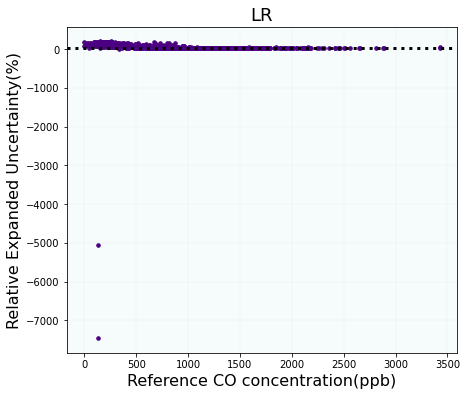

In [133]:
u_cal=REF(pred,y_test,1)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LR', fontsize=18)
plt.show()

In [134]:
REF2(Lab1,y_test,1,20000)

165.77445146787707

In [135]:
max(y_test)

3424.3903333333333

In [136]:
B=0
for i in range(len(y_test)):
    if y_test[i]==max(y_test):
        B=Lab1[i]    

In [137]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

In [138]:
Bias,Random

(197.20354054426087, 24.06019712986985)

In [139]:
import random
alpha=1.4
LV1=30000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100

In [140]:
Random1,Bias1

(2.128583121425964, 170.19597606185062)

<ipython-input-127-6842ed1662bc>:32: RuntimeWarning: divide by zero encountered in true_divide
  A=(2*(np.array(P))**0.5/ref)*100
<ipython-input-127-6842ed1662bc>:36: RuntimeWarning: divide by zero encountered in true_divide
  B=(2*(np.array(P3))/ref)*100
<ipython-input-127-6842ed1662bc>:40: RuntimeWarning: divide by zero encountered in true_divide
  part1=(Beta_0/ref)*100


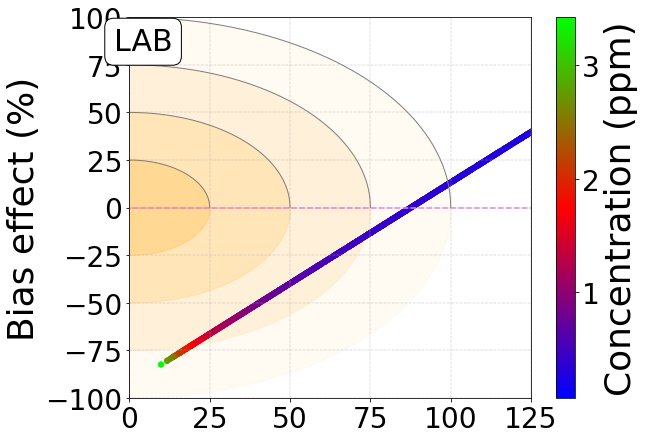

In [141]:
A=target(lab1,y_test,1.35)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)
plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')
#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=36)
#plt.title('CO',fontsize=18)
plt.scatter(Random,Bias,marker='.',s=300, color='red')
plt.scatter(Random1,Bias1,marker='.',s=300, color='teal')
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=np.array(A[2])/1000,cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25), fontsize=28)
plt.yticks(np.arange(-100,101, 25),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=28)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=36)
textstr = 'LAB'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.13, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)

plt.show()

In [142]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.4
LV1=30000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)/LV1)*100
Random1=(2*(P1+P2)**0.5/LV1)*100

In [143]:
A=target(pred,y_test,1.4)
len(A[0])

<ipython-input-127-6842ed1662bc>:32: RuntimeWarning: divide by zero encountered in true_divide
  A=(2*(np.array(P))**0.5/ref)*100
<ipython-input-127-6842ed1662bc>:36: RuntimeWarning: divide by zero encountered in true_divide
  B=(2*(np.array(P3))/ref)*100
<ipython-input-127-6842ed1662bc>:40: RuntimeWarning: divide by zero encountered in true_divide
  part1=(Beta_0/ref)*100


2298

<ipython-input-127-6842ed1662bc>:32: RuntimeWarning: divide by zero encountered in true_divide
  A=(2*(np.array(P))**0.5/ref)*100
<ipython-input-127-6842ed1662bc>:36: RuntimeWarning: divide by zero encountered in true_divide
  B=(2*(np.array(P3))/ref)*100
<ipython-input-127-6842ed1662bc>:40: RuntimeWarning: divide by zero encountered in true_divide
  part1=(Beta_0/ref)*100


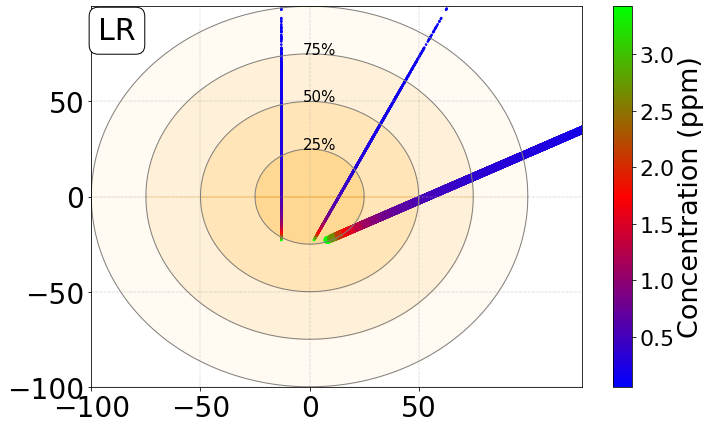

In [144]:
A=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(11,7))
plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x1,-1*y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x2,-1*y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x3,-1*y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')
plt.plot(x4,-1*y4, linewidth=1, color='grey')

plt.plot(-1*x1,y1, linewidth=1, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=1, color='grey')
plt.plot(-1*x2,y2, linewidth=1, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=1, color='grey')
plt.plot(-1*x3,y3, linewidth=1, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=1, color='grey')
plt.plot(-1*x4,y4, linewidth=1, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=1, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2])/1000,cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2])/1000,cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2])/1000,cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-50)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(-100,100, 50),fontsize=28)
plt.yticks(np.arange(-100,100, 50),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
#plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
#plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.09, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-3,25, '25%',fontsize=15)
plt.text(-3,50, '50%',fontsize=15)
plt.text(-3,75, '75%',fontsize=15)
plt.show()

(-2.0, 1.0)

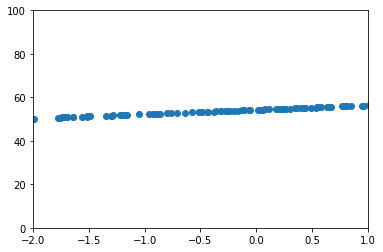

In [146]:
plt.scatter(A[1],A[0])
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=1)
plt.xlim(xmin=-2)

In [147]:
REF2(Lab1,y_test,1,30000)

166.7437834585453

In [148]:
REF2(pred,y_test,1,30000)

30.11528832078089

fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,201)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.2)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='#513e00',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-20, C, r'$R^{2}(LR)=$'+str(R2_lr_CO), fontsize = 14, color='#513e00')
#plt.text(B-20, D, r'$R^{2}(Lab)=$' +str(R2_lab_CO), fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [149]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_lr=pred
MBE_LR_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_CO=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_CO=MBE(lab1,y_test)/np.std(y_test)
CRMSE_LAB_CO=CRMSE(y_test,lab1)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 92.77
Mean squared error(MSE) = 23816.39
Median absolute error = 56.23
Explain variance score = 0.87
R2 score = 0.87


## Model 2 :  Support Vector Regression (SVR)

In [150]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'linear')
regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
for i in range(len(Pred)):
    if pred[i]<0:
        pred[i]=np.mean(np.array(pred))
pred_svr=pred

In [151]:
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)

Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_CO=sMAPE_lr
RMSE_svr_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_svr_CO=Pearson_lr
R2_svr_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_CO=RMSE_lr

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-20, C,r'$R^{2}(SVR)=$'+str(R2_svr_CO) , fontsize = 14, color='brown')
#plt.text(B-20, D,r'$R^{2}(Lab)=$'+str(R2_lab_CO) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [152]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_svr=pred
MBE_SVR_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 91.28
Mean squared error(MSE) = 24068.19
Median absolute error = 52.61
Explain variance score = 0.87
R2 score = 0.87


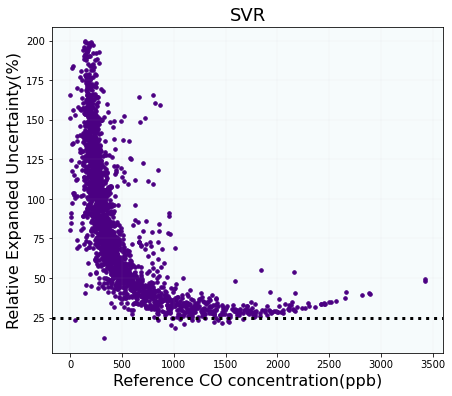

In [153]:
u_cal=REF(pred,y_test,1.4)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('SVR', fontsize=18)
plt.show()

In [154]:
REF2(pred,y_test,1,20000)

35.446194402671885

In [155]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.4
LV1=30000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100

<ipython-input-127-6842ed1662bc>:32: RuntimeWarning: divide by zero encountered in true_divide
  A=(2*(np.array(P))**0.5/ref)*100
<ipython-input-127-6842ed1662bc>:36: RuntimeWarning: divide by zero encountered in true_divide
  B=(2*(np.array(P3))/ref)*100
<ipython-input-127-6842ed1662bc>:40: RuntimeWarning: divide by zero encountered in true_divide
  part1=(Beta_0/ref)*100


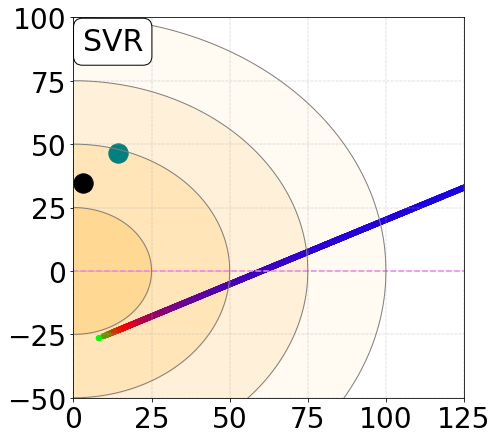

In [156]:
A=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(7,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x1,-1*y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x2,-1*y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x3,-1*y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')
plt.plot(x4,-1*y4, linewidth=1, color='grey')

#plt.xlabel('Random  uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=np.array(A[2])/1000,cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-50)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=28)
plt.yticks(np.arange(-50,101, 25),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'SVR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

In [157]:
REF2(pred,y_test,1,30000)

35.09945688227461

## Model 3 : Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))

In [159]:
features_CO=regressor.feature_importances_
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
pred_rf_co=pred
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_CO=sMAPE_lr
RMSE_rf_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_rf_CO=Pearson_lr
R2_rf_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_CO=RMSE_lr

In [160]:
features_CO

array([0.72176038, 0.07257308, 0.05259717, 0.04274231, 0.02501223,
       0.08531484])

fig= plt.figure(figsize=(30,4))

ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='black',linewidth=3)
plt.plot(index,pred[A:], color='red',linewidth=3)
plt.plot(index,lab1[A:], color='blue',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.79,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
plt.text(B-20, C, r'$R^{2}(RF)=$'+str(R2_rf_CO), fontsize = 14, color='red')
plt.text(B-20, D, r'$R^{2}(Lab)=$'+str(R2_lab_CO), fontsize = 14, color='blue')
plt.text(B-72, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='red')
plt.text(B-72, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='blue')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
#plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [161]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_rf=pred
MBE_RF_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 65.14
Mean squared error(MSE) = 13337.83
Median absolute error = 31.86
Explain variance score = 0.93
R2 score = 0.93


R2=[]
DQO=[]
lv=max(y_test)
for i in range(1,25):
    regressor=regressor.fit(X_train[:360*i].drop(['Lab1'], axis=1), y_train[:360*i])
    pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
    dqo=REF2(pred,y_test,1.3,lv)
    r2=round(sm.r2_score(y_test, pred), 2)
    DQO.append(dqo)
    R2.append(r2)
    
    

# Hyper parameter tuning

In [162]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [163]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
#                               verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)
#rf_random.best_params_
#{'n_estimators': 400,
 #'min_samples_split': 2,
 #'min_samples_leaf': 1,
 #'max_features': 'sqrt',
 #'max_depth': None,
 #'bootstrap': False}

In [164]:
u_cal_s=((REF10(pred,y_test,1.4)))**2
u_cal_s

y=(y_test)**2
y=np.array(y).reshape(-1,1)
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(y,u_cal_s)
model.coef_,model.intercept_

(array([0.00190245]), 11982.642912454034)

In [165]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(y,u_cal_s)
model.coef_,model.intercept_

(array([0.00190245]), 11982.642912454034)

In [166]:
U=(1/len(y_test))*sum(0.26**2*(0.997*np.array(y_test)**2+9*10**5))
np.sqrt(U)

299.0889379970204

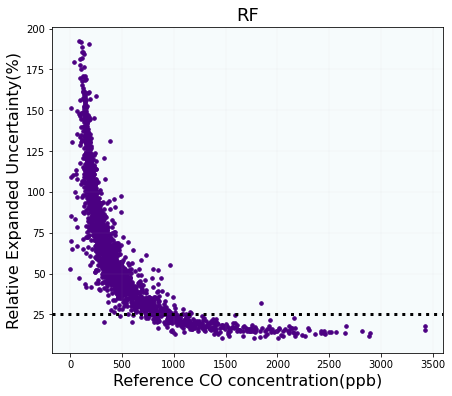

In [167]:
u_cal=REF(pred,y_test,1.4)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('RF', fontsize=18)
plt.show()

In [211]:
u_r=0.15
U=np.sqrt(np.mean((u_r*np.array(y_test))**2))
RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_test))**2))
ind=RMSE/(2*U)
ind

0.6433077010719193

In [212]:
A=[i for i in np.arange(1,3,0.05)]
B=[]
for i in A:
    k=REF2(pred,y_test,i,30000)
    B.append(k)
for i in range(len(B)):
    if B[i]==min(B):
        print(A[i])

1.3500000000000003


In [213]:
REF2(pred,y_test,1.3,30000)

22.900621971818495

In [281]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV1=30000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100



import random
alpha=1.4
LV1=30000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

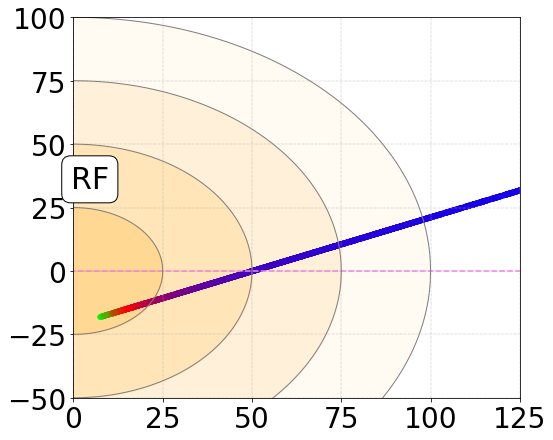

In [272]:
A=target(pred,y_test,1.35)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(8,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x1,-1*y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x2,-1*y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x3,-1*y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')
plt.plot(x4,-1*y4, linewidth=1, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
c=A[2]
plt.scatter(A[0],A[1],marker='.',s=100,c=np.array(c)/1000,cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-50)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=28)
plt.yticks(np.arange(-50,101, 25),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

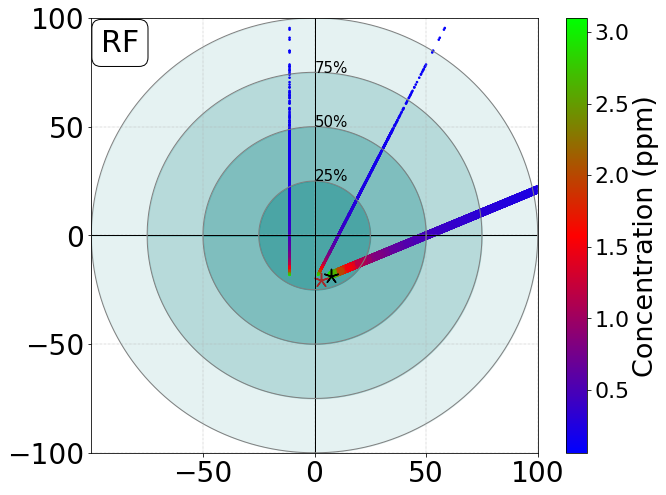

In [297]:
A=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.4)
plt.fill_between(a2, b2, color='teal',alpha=0.3)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.1)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x1,-1*y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x2,-1*y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x3,-1*y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')
plt.plot(x4,-1*y4, linewidth=1, color='grey')

plt.plot(-1*x1,y1, linewidth=1, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=1, color='grey')
plt.plot(-1*x2,y2, linewidth=1, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=1, color='grey')
plt.plot(-1*x3,y3, linewidth=1, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=1, color='grey')
plt.plot(-1*x4,y4, linewidth=1, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=1, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2])/1000,cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2])/1000,cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=1)
plt.hlines([0], -130, 130, color='black',linewidth=1)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-50,101, 50),fontsize=28)
plt.yticks(np.arange(-100,101, 50),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1+2,Bias1,marker=(5, 2),s=200, color='brown')
textstr = 'RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.14, 1.98, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(0,25, '25%',fontsize=15)
plt.text(0,50, '50%',fontsize=15)
plt.text(0,75, '75%',fontsize=15)
plt.show()

In [318]:
A=[i for i in np.arange(1,3,0.05)]
B=[]
for i in A:
    k=REF2(pred,y_test,i,30000)
    B.append(k)
for i in range(len(B)):
    if B[i]==min(B):
        print(A[i])

1.3500000000000003


In [319]:
np.std(pred),np.std(y_test)

(430.98299501066174, 456.5998284750989)

In [320]:
X_Train, X_Test, y_Train, y_Test =train_test_split(X, y, test_size = 0.001)
REU_CO=[]
for i in range(1,30):
    regressor=regressor.fit(X_train[:120*i].drop(['Lab1'], axis=1), y_train[:120*i])
    pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
    reu=REF2(pred,y_test,1.35,30000)
    REU_CO.append(reu) 

## Model 5: ANN

In [321]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(3, input_shape = (6,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 21        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 30,046
Trainable params: 30,046
Non-trainable params: 0
_________________________________________________________________


In [322]:
scaler = StandardScaler()
scaler.fit(X_train.drop(['Lab1'], axis=1))
X_train_scaled=scaler.transform(X_train.drop(['Lab1'], axis=1))
X_test_scaled=scaler.transform(X_test.drop(['Lab1'], axis=1))
hist=model.fit(X_train_scaled, y_train, batch_size= 10, epochs=40, verbose= 0)#,validation_split=0.2

In [323]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_CO=sMAPE_lr
RMSE_ann_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_ann_CO=Pearson_lr
R2_ann_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_CO=RMSE_lr

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-200, C, r'$R^{2}(ANN)=$'+str(R2_ann_CO), fontsize = 14, color='tomato')
#plt.text(B-200, D, r'$R^{2}(Lab)=$'+str(R2_lab_CO), fontsize = 14, color='#426eff')
#plt.text(B-800, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-800, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('ANN Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [324]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_ann=pred
MBE_ANN_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 91.25
Mean squared error(MSE) = 24795.73
Median absolute error = 54.21
Explain variance score = 0.88
R2 score = 0.88


In [325]:
len(pred_ann)

2322

fig= plt.figure(figsize=(50,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.plot(index[A:],pred_lr[A:], color='goldenrod',linewidth=3)
plt.plot(index[A:],pred_svr[A:], color='brown',linewidth=3)
plt.plot(index[A:],pred_rf[A:], color='indigo',linewidth=3)
plt.plot(index[A:],pred_ann[A:], color='tomato',linewidth=3)

plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.ylabel('CO Concentration(ppb)',fontsize=18)
plt.legend(['Ref', 'LAB', 'LR','SVR','RF','ANN'], loc = 2, bbox_to_anchor = (0.95,1))
#plt.title('CO Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.3)

Text(0.5, 1.0, 'ANN')

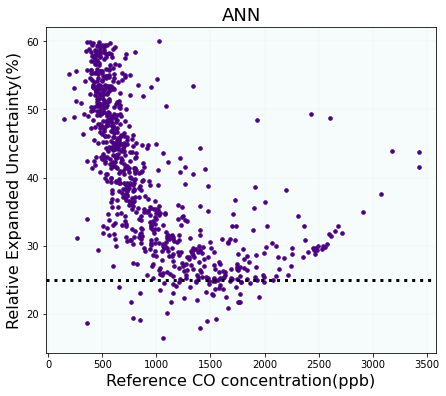

In [326]:
u_cal=REF(pred,y_test,1.4)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if u_cal[i]<60:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('ANN', fontsize=18)

In [327]:
REF2(pred,y_test,1,30000)

33.98982839230497

In [328]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.4
LV1=30000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100

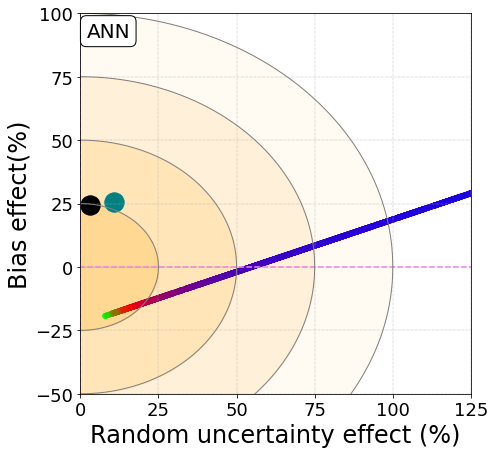

In [345]:
A=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(7,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x1,-1*y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x2,-1*y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x3,-1*y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')
plt.plot(x4,-1*y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect(%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=np.array(A[2])/1000,cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-50)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=18)
plt.yticks(np.arange(-50,101, 25),fontsize=18)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'ANN'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.06, 1.16, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

plt.show()

In [331]:
A=[i for i in np.arange(1,3,0.05)]
B=[]
for i in A:
    k=REF2(pred,y_test,i,30000)
    B.append(k)
for i in range(len(B)):
    if B[i]==min(B):
        print(A[i])

1.3500000000000003


# Model 6: XGBoost

In [334]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)
model.fit(X_train.drop(['Lab1'], axis=1), y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [335]:
pred = model.predict(X_test.drop(['Lab1'], axis=1))
pred_xgb_co=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_CO=sMAPE_lr
RMSE_xgb_CO=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_CO=Pearson_lr
R2_xgb_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_CO=RMSE_lr

In [336]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_xgb=pred
MBE_XGB_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 84.92
Mean squared error(MSE) = 21903.82
Median absolute error = 52.61
Explain variance score = 0.89
R2 score = 0.89


Text(0.5, 1.0, 'XGBoost')

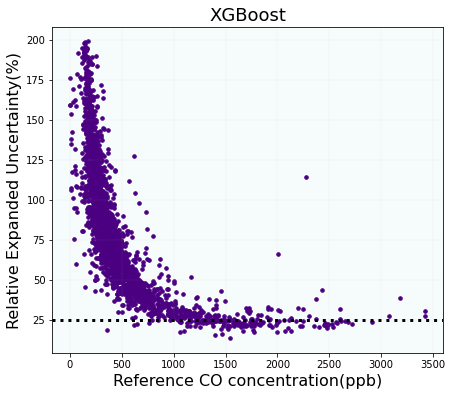

In [337]:
u_cal=REF(pred,y_test,1.4)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('XGBoost', fontsize=18)

In [338]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.4
LV1=30000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100

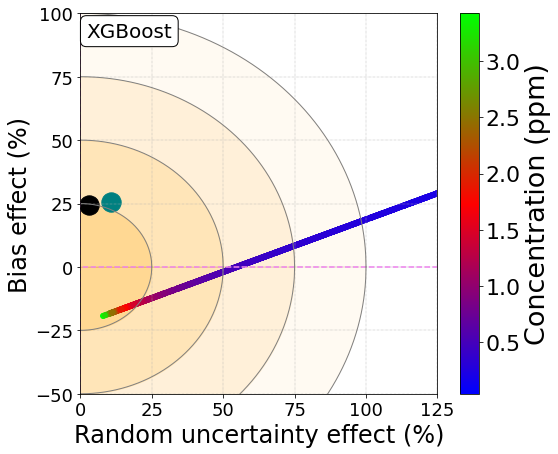

In [343]:
A=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(8,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x1,-1*y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x2,-1*y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x3,-1*y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')
plt.plot(x4,-1*y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=np.array(A[2])/1000,cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-50)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=18)
plt.yticks(np.arange(-50,101, 25),fontsize=18)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'XGBoost'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.06, 1.16, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.show()

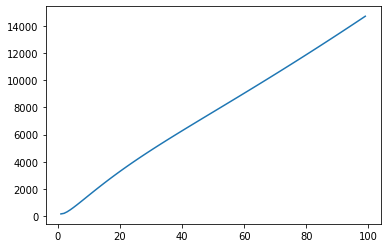

In [340]:
B=[]
for i in range(1,100):
    U=REF2(Lab1,y_test,i,30000)
    B.append(U)
ind=[i for i in range(1,100)]
plt.plot(ind,B)

In [341]:
A=[i for i in np.arange(1,3,0.05)]
B=[]
for i in A:
    k=REF2(pred,y_test,i,30000)
    B.append(k)
for i in range(len(B)):
    if B[i]==min(B):
        print(A[i])

1.4000000000000004


# NO2 Calibration

In [70]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [71]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('20min').mean()
NO2_Data=NO2_Data.dropna()
NO2_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_O3
Date,,,,,,,,,,
2019-10-02 11:40:00,460.448301,26.378438,58.063437,15.230400,7.850000,10.0,2.0,2.0,11.0,46.094860
2019-10-02 12:00:00,794.371300,25.632544,48.527009,6.653971,25.045773,10.0,2.0,2.0,12.0,56.858942
2019-10-02 12:20:00,82.998996,26.120078,47.716553,2.844210,13.152720,10.0,2.0,2.0,12.0,58.880540
2019-10-02 15:40:00,566.301152,30.418466,50.153181,10.084125,9.323533,10.0,2.0,2.0,15.0,40.068225
2019-10-03 15:40:00,84.482370,29.421250,52.411845,12.621282,22.596524,10.0,3.0,3.0,15.0,33.473237


In [72]:
def REF(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.4 for i in range(len(ref))])
    u=np.maximum(prec,0.005*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/cal)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [73]:
def REF2(pred,y_test,alpha,LV):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.4 for i in range(len(ref))])
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
    P3=(Beta_0+(Beta_1-1)*LV)**2
    P=P1+P2+P3
    if P<0:
        P=random.randint(1,100)
    u_cal=(2*np.sqrt(P)/(Beta_0+Beta_1*LV))*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*0.1+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [74]:
def target(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.4 for i in range(len(ref))])
    u=np.maximum(prec, 0.005*ref)
    #u=0.01*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P2)):
        P.append(P1+P2[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,50)
    A=(2*(np.array(P))**0.5/cal)*100
    for i in range(len(P3)):
        if P3[i]<0:
            P3[i]=random.randint(0,50)
    B=(2*(np.array(P3))**0.5/cal)*100
    bias=[]
    random=[]
    Ref=[]
    for i in range(len(A)):
        if A[i]<120:
            random.append(A[i])
            bias.append(B[i])
            Ref.append(ref[i])
    
    return [random,bias,Ref]

In [75]:
#Ref=NO2_Data['Ref'].to_list()
#NO2_Data=NO2_Data[NO2_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#NO2_Data.shape

## Model 1: Linear Regression (LR)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_test)

2185

In [77]:
lr = LinearRegression()
model = lr.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = model.predict(X_test.drop(['Lab1'], axis=1))
lab1=X_test['Lab1'].to_list()
for i in range(len(lab1)):
    if lab1[i]>100:
        lab1[i]=np.mean(lab1)
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_NO2=sMAPE_lr
RMSE_lr_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_lr_NO2=Pearson_lr
sMAPE_lab_NO2=sMAPE_lab
RMSE_lab_NO2=round(RMSE_lab/np.mean(np.array(lab1)),2)
Pearson_lab_NO2=Pearson_lab
R2_lr_NO2=round(sm.r2_score(y_test, pred), 2)
R2_lab_NO2=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_NO2=RMSE_lr
RMSE_Lab_NO2=RMSE_lab

A=len(y_test)-200
B=120
D=max(y_test[A:])-0.15*max(y_test[A:])
C=max(y_test[A:])-0.05*max(y_test[A:])
Pearson_lr_NO2,R2_lr_NO2,RMSE_Lr_NO2

(0.9, 0.81, 5.3)

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,201)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='#513e00',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C,r'$R^{2}(LR)=$'+str(R2_lr_NO2) , fontsize = 14, color='#513e00')
#plt.text(B-150, D,r'$R^{2}(Lab)=$'+str(R2_lab_NO2) , fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [78]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_LR_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_NO2=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_NO2=MBE(lab1,y_test)/(2.6*np.std(y_test))
CRMSE_LAB_NO2=CRMSE(y_test,lab1)/(2.6*np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 4.12
Mean squared error(MSE) = 28.47
Median absolute error = 3.4
Explain variance score = 0.81
R2 score = 0.81


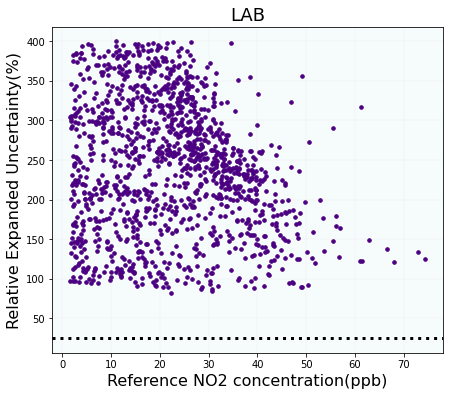

In [79]:
u_cal=REF(Lab1,y_test,1.3)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if u_cal[i]<400:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference NO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LAB', fontsize=18)
plt.show()

In [80]:
import random
alpha=1.3
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100
import random
alpha=1.3
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100
Bias1,Random1

(759.8164505062085, 192.3230438706587)

In [81]:
import random
alpha=1.3
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100
Bias1,Random1

(759.8164505062085, 192.3230438706587)

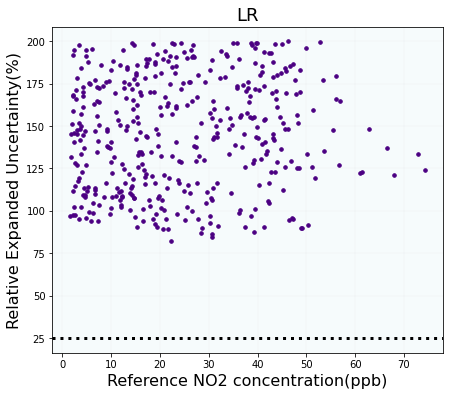

In [82]:
u_cal=REF(lab1,y_test,1.3)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference NO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LR', fontsize=18)
plt.show()

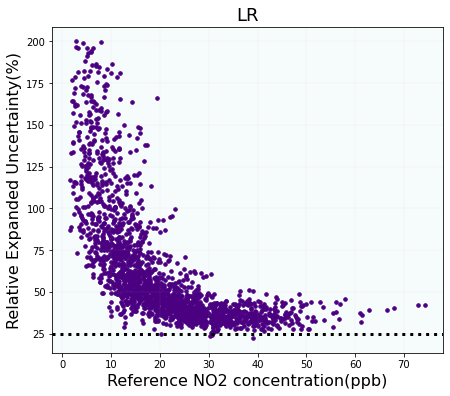

In [83]:
u_cal=REF(pred,y_test,1.3)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference NO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LR', fontsize=18)
plt.show()

In [84]:
import random
alpha=1.3
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100
import random
alpha=1.3
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100
Bias1,Random1

(759.8164505062085, 192.3230438706587)

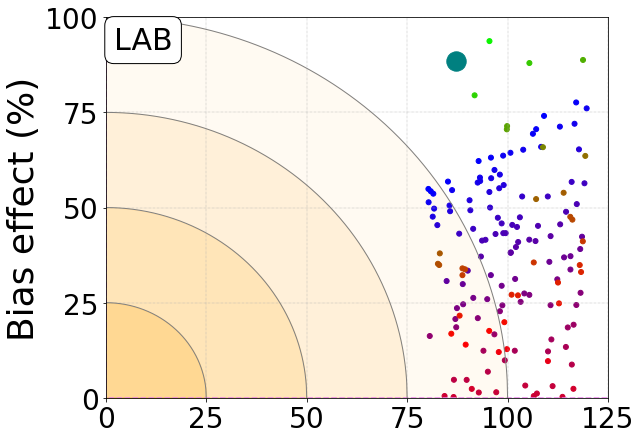

In [85]:
A=target(lab1,y_test,1.3)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')
plt.scatter(Random,Bias,marker='.',s=500, color='red')
plt.scatter(Random1,Bias1,marker='.',s=500, color='teal')
#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=36)
#plt.title(r'$NO_{2}$',fontsize=20)
#plt.title('NO2'.translate(sub),fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'LAB'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.13, 1.105, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

In [86]:
import random
alpha=1.3
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.3
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100

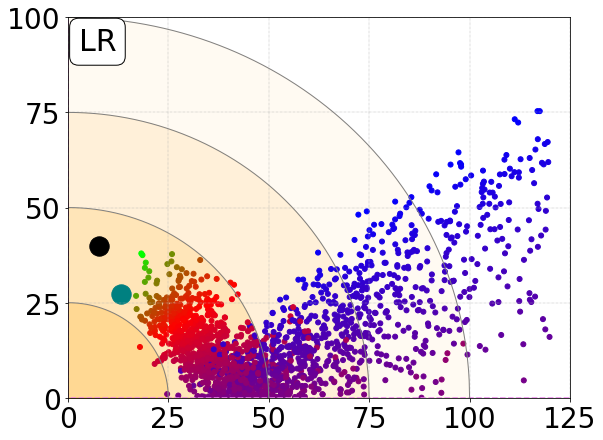

In [87]:
A=target(pred,y_test,1.3)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

#plt.xlabel('Random  uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias  effect (%)',fontsize=24)
#plt.title('NO2',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

## Model 2: Support Vector Regression (SVR)

In [88]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'poly')
regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
for i in range(len(Pred)):
    if pred[i]<0:
        pred[i]=np.mean(np.array(pred))

In [89]:
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_NO2=sMAPE_lr
RMSE_svr_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_svr_NO2=Pearson_lr
R2_svr_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_NO2=RMSE_lr
Pearson_svr_NO2,R2_svr_NO2,RMSE_Svr_NO2

(0.92, 0.84, 4.9)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C, r'$R^{2}(SVR)=$'+str(R2_svr_NO2), fontsize = 14, color='brown')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [90]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 3.58
Mean squared error(MSE) = 23.57
Median absolute error = 2.7
Explain variance score = 0.84
R2 score = 0.84


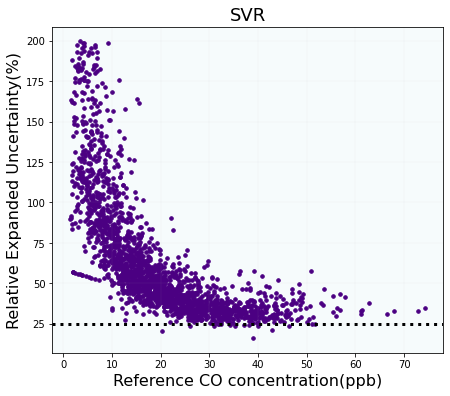

In [91]:
u_cal=REF(pred,y_test,1.3)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('SVR', fontsize=18)
plt.show()

In [92]:
import random
alpha=1.3
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.3
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100


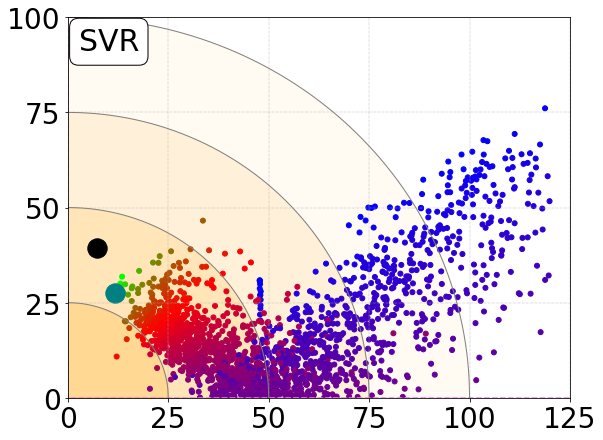

In [93]:
A=target(pred,y_test,1.3)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

#plt.xlabel('Random  uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('NO2',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'SVR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

## Model 3: Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,
                                  max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
# fit the regressor with x and y data
regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)  

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=500,
                      random_state=0)

In [95]:
Index=[i for i in range(len(y_test))]
features_NO2=regressor.feature_importances_
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
pred_rf_no2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_NO2=sMAPE_lr
RMSE_rf_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_rf_NO2=Pearson_lr
R2_rf_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_NO2=RMSE_lr
Pearson_rf_NO2,R2_rf_NO2,RMSE_Rf_NO2

(0.97, 0.94, 2.9)

fig= plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='indigo',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.79,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-15, C,r'$R^{2}(RF)=$'+str(R2_rf_NO2) , fontsize = 14, color='indigo')
plt.text(B-15, D,r'$R^{2}(Lab)=$'+str(R2_lab_NO2) , fontsize = 14, color='#426eff')
plt.text(B-73, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-73, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
plt.xlabel('Last 100 hours of testing period',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [96]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_RF_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 2.09
Mean squared error(MSE) = 8.55
Median absolute error = 1.52
Explain variance score = 0.94
R2 score = 0.94


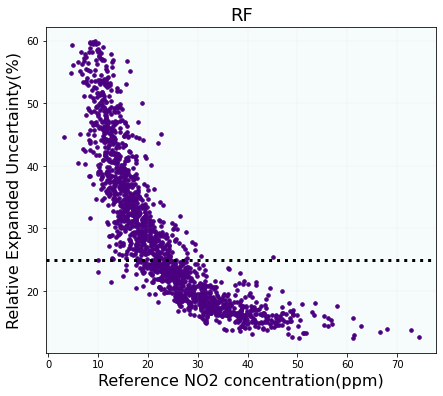

In [97]:
u_cal=REF(pred,y_test,1.3)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<60:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082', marker='.',s=50 )
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference NO2 concentration(ppm)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('RF', fontsize=18)
plt.show()

In [98]:
import random
alpha=1.3
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.3
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100


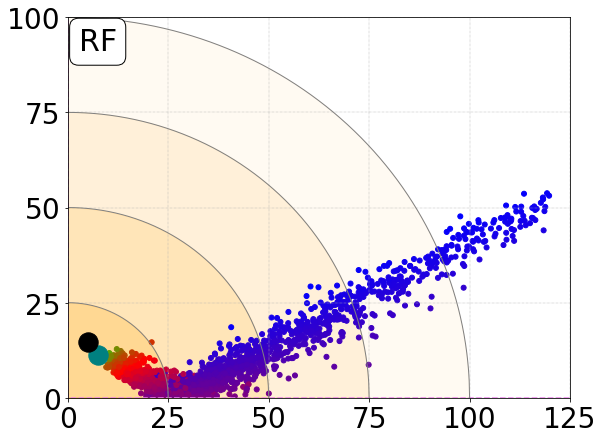

In [99]:
A=target(pred,y_test,1.3)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')
#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title(r'$NO_{2}$',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25), fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

In [100]:
cal=np.array(pred)
ref=np.array(y_test.to_list())
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
    #cal=np.log(cal)
    #ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+1)*(0.08*ref)**2)
du_s=RSS/(len(cal)-2)
Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(-2*Beta_1**2+2*Beta_1-1)*(0.08*40)**2
P3=(Beta_0+(Beta_1-1)*40)**2
P1,P2,P3

(1.9299572960373859, -9.145109213644982, 1.2681554022950299)

In [101]:
A=[i for i in np.arange(1,20,0.1)]
K=[]
for i in A:
    k=REF2(pred,y_test,i,200)
    K.append(k)
for i in range(len(K)):
    if K[i]==min(K):
        print(A[i])

1.3000000000000003


In [111]:
u_cal_s=((REF10(pred,y_test,1.3)/100)*np.array(y_test))**2
u_cal_s

y=(pred)**2
y=np.array(y).reshape(-1,1)
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(y,u_cal_s)
model.coef_,model.intercept_

(array([1.68230969]), -589.9682238960263)

## Model 4 : ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (7,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train.drop(['Lab1'], axis=1))
X_train_scaled=scaler.transform(X_train.drop(['Lab1'], axis=1))
X_test_scaled=scaler.transform(X_test.drop(['Lab1'], axis=1))
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=100, verbose= 0)

In [ ]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

In [ ]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_NO2=sMAPE_lr
RMSE_ann_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_ann_NO2=Pearson_lr
R2_ann_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_NO2=RMSE_lr
Pearson_ann_NO2,R2_ann_NO2,RMSE_Ann_NO2

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('NO2 Concentration(ppb)',fontsize=18)
#plt.text(B-150, C, r'$R^{2}(ANN)=$'+str(R2_ann_NO2), fontsize = 14, color='tomato')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title(' Artificial Neural Network(ANN)  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_NO2=CRMSE(y_test,pred)/(np.std(y_test))
pred_ann=pred

In [ ]:
u_cal=REF(pred,y_test,1.3)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference NO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('ANN', fontsize=18)
plt.show()

In [ ]:
import random
alpha=1.3
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.3
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100


In [ ]:
A=target(pred,y_test,1.3)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('NO2',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'ANN'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

# Model 5: XGBoost

In [ ]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)
model.fit(X_train.drop(['Lab1'], axis=1),y_train)

In [ ]:
pred = model.predict(X_test.drop(['Lab1'], axis=1))
pred_xgb_no2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_NO2=sMAPE_lr
RMSE_xgb_NO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_NO2=Pearson_lr
R2_xgb_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_NO2=RMSE_lr
Pearson_xgb_NO2,R2_xgb_NO2,RMSE_Xgb_NO2

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='darkgoldenrod',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.69,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C, r'$R^{2}(XGB)=$'+str(R2_xgb_NO2), fontsize = 14, color='darkgoldenrod')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_XGB_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

In [ ]:
u_cal=REF(pred,y_test,1.3)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference NO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('XGBoost', fontsize=18)
plt.show()

In [ ]:
import random
alpha=1.3
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.3
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100


In [ ]:
A=target(pred,y_test,1.3)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('NO2',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'XGBoost'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

 # SO2 Calibration

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
CO_Data=CO_Data.resample('20min').mean()
CO_Data=CO_Data.dropna()
SO2_Data.head()

In [ ]:
#Ref=SO2_Data['Ref'].to_list()
#SO2_Data=SO2_Data[SO2_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#SO2_Data.shape

In [ ]:
#sns.boxplot(x=SO2_Data['Ref'])
#z=np.abs(stats.zscore(SO2_Data))
#SO2_data=SO2_Data[(z < 3).all(axis=1)]
#SO2_data.shape,SO2_Data.shape

In [ ]:
def REF(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.5 for i in range(len(ref))])
    u=np.maximum(prec,0.0015*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/cal)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [ ]:
def REF2(pred,y_test,alpha,LV):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.5 for i in range(len(ref))])
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
    P3=(Beta_0+(Beta_1-1)*LV)**2
    P=P1+P2+P3
    if P<0:
        P=random.randint(1,100)
    u_cal=(2*np.sqrt(P)/(Beta_0+Beta_1*LV))*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*0.1+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [ ]:
def target(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.5 for i in range(len(ref))])
    u=np.maximum(prec, 0.0015*ref)
    #u=0.01*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P2)):
        P.append(P1+P2[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,50)
    A=(2*(np.array(P))**0.5/cal)*100
    for i in range(len(P3)):
        if P3[i]<0:
            P3[i]=random.randint(0,50)
    B=(2*(np.array(P3))**0.5/cal)*100
    bias=[]
    random=[]
    Ref=[]
    for i in range(len(A)):
        if A[i]<500:
            random.append(A[i])
            bias.append(B[i])
            Ref.append(ref[i])
    
    return [random,bias,Ref]

# Model 1: Linear Regression (LR)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_test)

In [ ]:
lr = LinearRegression()
model = lr.fit(X_train.drop(['Lab2'], axis=1), y_train)
pred = model.predict(X_test.drop(['Lab2'], axis=1))
lab1=X_test['Lab2'].to_list()
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_SO2=sMAPE_lr
RMSE_lr_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_lr_SO2=Pearson_lr
sMAPE_lab_SO2=sMAPE_lab
RMSE_lab_SO2=RMSE_lab/np.mean(np.array(lab1))
Pearson_lab_SO2=Pearson_lab
R2_lr_SO2=round(sm.r2_score(y_test, pred), 2)
R2_lab_SO2=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_SO2=RMSE_lr
RMSE_Lab_SO2=RMSE_lab

In [ ]:
u_cal=REF(Lab1,y_test,3.9)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LAB', fontsize=18)
plt.show()

In [ ]:
u_cal=REF(pred,y_test,3.9)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LR', fontsize=18)
plt.show()

In [ ]:
import random
alpha=3.9
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=3.9
LV1=350
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100
Bias1,Random1

In [ ]:
A=target(Lab1,y_test,3.9)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=34)
plt.ylabel('Bias effect (%)',fontsize=36)
#plt.title(r'$SO_{2}$',fontsize=20)
plt.scatter(Random,Bias,marker='.',s=700, color='red')
plt.scatter(Random1,Bias1,marker='.',s=700, color='teal')
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25), fontsize=28)
plt.yticks(np.arange(0,101, 25), fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
textstr = 'LAB'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.13, 1.21, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

In [ ]:
import random
alpha=3.9
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=3.9
LV1=350
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100


In [ ]:
A=target(pred,y_test,3.9)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=34)
#plt.ylabel('Bias effect (%)',fontsize=36)
#plt.title('SO2',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(np.array(A[0])/3,np.array(A[1])/3,marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,121, 25),fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.21, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

## Scaling Laboratory Calibration
For the purpose of visual comparison with the ref and calibrated measurements, the lab measurement was scaled by a factor of 0.05

In [ ]:
LAB1=0.2*np.array(Lab1)
A=len(y_test)-200
D=max(LAB1[A:])-0.2*max(LAB1[A:])
C=max(LAB1[A:])-0.1*max(LAB1[A:])
B=4000

fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,201)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='#513e00',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'LAB-Calibrated(scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-100, C, r'$R^{2}(LR)=$'+str(R2_lr_SO2), fontsize = 14, color='#513e00')
#plt.text(B-100, D, r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
#plt.text(B-400, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-400, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()


In [ ]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_LR_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_SO2=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_SO2=MBE(lab1,y_test)/(25*np.std(y_test))
CRMSE_LAB_SO2=CRMSE(y_test,lab1)/25*(np.std(y_test))
pred_lr=pred

# Model 2: SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'poly',degree=3)
regressor.fit(X_train.drop(['Lab2'], axis=1), y_train)
pred = regressor.predict(X_test.drop(['Lab2'], axis=1))

In [ ]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_SO2=sMAPE_lr
RMSE_svr_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_svr_SO2=Pearson_lr
R2_svr_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_SO2=RMSE_lr

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(SVR)=$'+str(R2_svr_SO2) , fontsize = 14, color='brown')
#plt.text(B-200, D, r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
#plt.text(B-420, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-420, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

In [ ]:
u_cal=REF(pred,y_test,1.9)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('SVR', fontsize=18)
plt.show()

In [ ]:
A=target(pred,y_test,3.9)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=34)
#plt.ylabel('Bias effect (%)',fontsize=36)
#plt.title('SO2',fontsize=20)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(np.array(A[0])/3,np.array(A[1])/3,marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'SVR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.21, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

 # Model 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train.drop(['Lab2'], axis=1), y_train)  

In [ ]:
Index=[i for i in range(len(y_test))]
features_SO2=regressor.feature_importances_
pred = regressor.predict(X_test.drop(['Lab2'], axis=1))
pred_rf_so2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_SO2=sMAPE_lr
RMSE_rf_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_rf_SO2=Pearson_lr
R2_rf_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_SO2=RMSE_lr

fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='indigo',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.72,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-20, C,r'$R^{2}(RF)=$'+str(R2_rf_SO2) , fontsize = 14, color='indigo')
plt.text(B-20, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2) , fontsize = 14, color='#426eff')
plt.text(B-70, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_RF_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

In [ ]:
u_cal=REF(pred,y_test,3.9)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('RF', fontsize=18)
plt.show()

In [ ]:
import random
alpha=3.9
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=3.9
LV1=350
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100


In [ ]:
A=target(pred,y_test,3.9)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=34)
#plt.ylabel('Bias effect (%)',fontsize=36)
#plt.title(r'$SO_{2}$',fontsize=20)
#plt.scatter(Random,Bias,marker='.',s=700, color='red')
#plt.scatter(Random1+2,Bias1,marker='.',s=700, color='teal')
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25), fontsize=28)
plt.yticks(np.arange(0,101, 25), fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+4,Bias1+4,marker='.',s=1500, color='black')
textstr = 'RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.21, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

In [ ]:
A=[i for i in np.arange(1,20,0.1)]
K=[]
for i in A:
    k=REF2(pred,y_test,i,350)
    K.append(k)
for i in range(len(K)):
    if K[i]==min(K):
        print(A[i])

# Model 4 : ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (6,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(50, kernel_initializer='normal',activation= 'relu'))
#model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train.drop(['Lab2'], axis=1))
X_train_scaled=scaler.transform(X_train.drop(['Lab2'], axis=1))
X_test_scaled=scaler.transform(X_test.drop(['Lab2'], axis=1))
model.fit(X_train_scaled, y_train, batch_size= 200, epochs=100, verbose= 0)

In [ ]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

In [ ]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_SO2=sMAPE_lr
RMSE_ann_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_ann_SO2=Pearson_lr
R2_ann_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_SO2=RMSE_lr

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(ANN)=$'+str(R2_ann_SO2) , fontsize = 14, color='tomato')
#plt.text(B-200, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2) , fontsize = 14, color='#426eff')
#plt.text(B-400, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-400, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Artificial Neural Network(ANN)  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_ann=pred

In [ ]:
u_cal=REF(pred,y_test,3.9)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('ANN', fontsize=18)
plt.show()

In [ ]:
import random
alpha=3.9
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=3.9
LV1=350
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100


In [ ]:
A=target(pred,y_test,3.9)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=34)
#plt.ylabel('Bias effect (%)',fontsize=36)
#plt.title('SO2',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'ANN'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.21, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

# Model 5 : XGBoost

In [ ]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)

model.fit(X_train.drop(['Lab2'], axis=1),y_train)

In [ ]:
pred = model.predict(X_test.drop(['Lab2'], axis=1))
pred_xgb_so2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_SO2=sMAPE_lr
RMSE_xgb_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_SO2=Pearson_lr
R2_xgb_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_SO2=RMSE_lr

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='darkgoldenrod',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated(scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(XGB)=$'+str(R2_xgb_SO2) , fontsize = 14, color='darkgoldenrod')
#plt.text(B-200, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
#plt.text(B-400, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-400, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_XGB_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

In [ ]:
u_cal=REF(pred,y_test,3.9)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('XGBoost', fontsize=18)
plt.show()

In [ ]:
import random
alpha=3.9
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=3.9
LV1=350
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100


In [ ]:
A=target(pred,y_test,3.9)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=31)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('SO2',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=30,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'XGBoost'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.21, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

# O3 CALIBRATION

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('20min').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

In [ ]:
#Ref=O3_Data['Ref'].to_list()
#O3_Data=O3_Data[O3_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#O3_Data.shape

In [ ]:
def REF(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([1 for i in range(len(ref))])
    #u=np.maximum(prec,0.0015*ref)
    u=prec
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/cal)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [ ]:
def REF2(pred,y_test,alpha,LV):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([1 for i in range(len(ref))])
    #u=0.001*ref
    u=prec
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
    P3=(Beta_0+(Beta_1-1)*LV)**2
    P=P1+P2+P3
    if P<0:
        P=random.randint(1,100)
    u_cal=(2*np.sqrt(P)/(Beta_0+Beta_1*LV))*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*0.1+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [ ]:
def target(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([1 for i in range(len(ref))])
    #u=np.maximum(prec, 0.0015*ref)
    u=prec
    #u=0.01*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P2)):
        P.append(P1+P2[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,50)
    A=(2*(np.array(P))**0.5/cal)*100
    for i in range(len(P3)):
        if P3[i]<0:
            P3[i]=random.randint(0,50)
    B=(2*(np.array(P3))**0.5/cal)*100
    bias=[]
    random=[]
    Ref=[]
    for i in range(len(A)):
        if A[i]<120:
            random.append(A[i])
            bias.append(B[i])
            Ref.append(ref[i])
    
    return [random,bias,Ref]

## Model 1: LR

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_test)

In [ ]:
lr = LinearRegression()
model = lr.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = model.predict(X_test.drop(['Lab1'], axis=1))
lab1=X_test['Lab1'].to_list()
for i in range(len(lab1)):
    if lab1[i]>370:
        lab1[i]=np.mean(lab1)
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_O3=sMAPE_lr
RMSE_lr_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_lr_O3=Pearson_lr
sMAPE_lab_O3=sMAPE_lab
RMSE_lab_O3=RMSE_lab/np.mean(np.array(lab1))
Pearson_lab_O3=Pearson_lab
R2_lr_O3=round(sm.r2_score(y_test, pred), 2)
R2_lab_O3=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_O3=RMSE_lr
RMSE_Lab_O3=RMSE_lab

A=len(y_test)
D=max(lab1)-0.10*max(lab1)
C=max(lab1)-0.03*max(lab1)
B=A

Pearson_lr_O3,R2_lr_O3,RMSE_Lr_O3

fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,len(y_test)+1)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test, color='limegreen',linewidth=3)
plt.plot(index,pred, color='#513e00',linewidth=3)
plt.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(LR)=$'+str(R2_lr_O3) , fontsize = 14, color='#513e00')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.title('Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_LR_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_O3=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_O3=MBE(lab1,y_test)/(3.6*np.std(y_test))
CRMSE_LAB_O3=CRMSE(y_test,lab1)/(3.6*np.std(y_test))
pred_lr=pred

In [ ]:
u_cal=REF(lab1,y_test,1.2)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference O3 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LAB', fontsize=18)
plt.show()

In [ ]:
u_cal=REF(pred,y_test,1.2)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference O3 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LR', fontsize=18)
plt.show()

In [ ]:
import random
alpha=1.2
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.2
LV1=120
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100
Bias1,Random1

In [ ]:
A=target(Lab1,y_test,1.2)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =60
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =90
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =120
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,60.1,0.1)
r2=60
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,90.1,0.1)
r3=90
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,120.1,0.1)
r4=120
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect(%)',fontsize=36)
#plt.title(r'$O_{3}$',fontsize=20)
plt.scatter(Random,Bias,marker='.',s=700, color='red')
plt.scatter(Random1,Bias1,marker='.',s=700, color='teal')
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=120)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,121, 30), fontsize=28)
plt.yticks(np.arange(0,121, 30), fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'LAB'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.13, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

In [ ]:
import random
alpha=1.2
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.2
LV1=120
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100

In [ ]:
A=target(pred,y_test,1.2)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =60
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =90
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =120
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,60.1,0.1)
r2=60
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,90.1,0.1)
r3=90
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,120.1,0.1)
r4=120
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('O3',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,121, 30),fontsize=28)
plt.yticks(np.arange(0,121, 30),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.1, textstr, transform=ax.transAxes, fontsize=36,
        verticalalignment='top', bbox=props)
plt.show()

## Model 2: SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'linear')
regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))

In [ ]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_O3=sMAPE_lr
RMSE_svr_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_svr_O3=Pearson_lr
R2_svr_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_O3=RMSE_lr
Pearson_svr_O3,R2_svr_O3,RMSE_Svr_O3

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test, color='limegreen',linewidth=3)
plt.plot(index,pred, color='brown',linewidth=3)
plt.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(SVR)=$'+str(R2_svr_O3) , fontsize = 14, color='brown')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression(SVR) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

In [ ]:
u_cal=REF(pred,y_test,1.2)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference O3 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('SVR', fontsize=18)

plt.show()

In [ ]:
import random
alpha=1.2
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.2
LV1=120
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100

In [ ]:
A=target(pred,y_test,1.2)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =60
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =90
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =120
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,60.1,0.1)
r2=60
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,90.1,0.1)
r3=90
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,120.1,0.1)
r4=120
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('O3',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,121, 30),fontsize=28)
plt.yticks(np.arange(0,121, 30),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'SVR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

##  Model 3 : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
# fit the regressor with x and y data
regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)  

In [ ]:
Index=[i for i in range(len(y_test))]
features_O3=regressor.feature_importances_
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
pred_rf_o3=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_O3=sMAPE_lr
RMSE_rf_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_rf_O3=Pearson_lr
R2_rf_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_O3=RMSE_lr
Pearson_rf_O3,R2_rf_O3,RMSE_Rf_O3

fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='indigo',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.79,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-22, C,r'$R^{2}(RF)=$'+str(R2_rf_O3) , fontsize = 14, color='indigo')
plt.text(B-22, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
plt.text(B-72, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-72, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 100 hours of testing period',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Random Forest(RF) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))


MBE_RF_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

In [ ]:
features_O3

In [ ]:
u_cal=REF(pred,y_test,1.2)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference O3 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('RF', fontsize=18)
plt.show()

In [ ]:
import random
alpha=1.2
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.2
LV1=120
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100

In [ ]:
A=target(pred,y_test,1.2)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =60
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =90
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =120
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,60.1,0.1)
r2=60
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,90.1,0.1)
r3=90
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,120.1,0.1)
r4=120
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')
#plt.scatter(Random+1,Bias+6,marker='.',s=700, color='red')
#plt.scatter(Random1,Bias1,marker='.',s=700, color='teal')
#plt.xlabel('Random  uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect(%)',fontsize=24)
#plt.title(r'$O_{3}$',fontsize=20)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=120)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,121, 30), fontsize=28)
plt.yticks(np.arange(0,121, 30), fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

In [ ]:
A=[i for i in np.arange(1,20,0.1)]
K=[]
for i in A:
    k=REF2(pred,y_test,i,350)
    K.append(k)
for i in range(len(K)):
    if K[i]==min(K):
        print(A[i])

## Model 4: ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (7,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train.drop(['Lab1'], axis=1))
X_train_scaled=scaler.transform(X_train.drop(['Lab1'], axis=1))
X_test_scaled=scaler.transform(X_test.drop(['Lab1'], axis=1))
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=200, verbose= 0)

In [ ]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

In [ ]:

Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_O3=sMAPE_lr
RMSE_ann_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_ann_O3=Pearson_lr
R2_ann_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_O3=RMSE_lr
Pearson_ann_O3,R2_ann_O3,RMSE_Ann_O3

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='tomato',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppm)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(ANN)=$'+str(R2_ann_O3) , fontsize = 14, color='tomato')
#plt.text(B-5, D, r'$R^{2}(Lab)=$'+str(R2_lab_O3), fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Artificial Neural Network(ANN) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_ann=pred

In [ ]:
u_cal=REF(pred,y_test,1.2)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference O3 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('ANN', fontsize=18)
plt.show()

In [ ]:
import random
alpha=1.2
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.2
LV1=120
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100

In [ ]:
A=target(pred,y_test,1.2)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =60
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =90
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =120
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,60.1,0.1)
r2=60
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,90.1,0.1)
r3=90
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,120.1,0.1)
r4=120
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('O3',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,121, 30),fontsize=28)
plt.yticks(np.arange(0,121, 30),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'ANN'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

# Model 5:  XGBoost

In [ ]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)

model.fit(X_train.drop(['Lab1'], axis=1),y_train)

In [ ]:
pred = model.predict(X_test.drop(['Lab1'], axis=1))
pred_xgb_o3=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_O3=sMAPE_lr
RMSE_xgb_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_O3=Pearson_lr
R2_xgb_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_O3=RMSE_lr
Pearson_xgb_O3,R2_xgb_O3,RMSE_Xgb_O3

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='darkgoldenrod',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(XGB)=$'+str(R2_xgb_O3) , fontsize = 14, color='darkgoldenrod')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_XGB_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

In [ ]:
A=len(y_test)-200

In [ ]:
u_cal=REF(pred,y_test,1)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('XGBoost', fontsize=18)
plt.show()

In [ ]:
import random
alpha=1.2
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=1.2
LV1=120
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100

In [ ]:
A=target(pred,y_test,1.2)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =60
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =90
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =120
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,60.1,0.1)
r2=60
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,90.1,0.1)
r3=90
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,120.1,0.1)
r4=120
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('O3',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,121, 30),fontsize=28)
plt.yticks(np.arange(0,121, 30),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'XGBoost'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.1, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

# Data Analytics

In [ ]:
import chart_studio.plotly
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
import numpy as np

LAB_PR=[Pearson_lab_CO,Pearson_lab_NO2,Pearson_lab_SO2,Pearson_lab_O3]
LR_PR=[Pearson_lr_CO,Pearson_lr_NO2,Pearson_lr_SO2,Pearson_lr_O3]
SVR_PR=[Pearson_svr_CO,Pearson_svr_NO2,Pearson_svr_SO2,Pearson_svr_O3]
RF_PR=[Pearson_rf_CO,Pearson_rf_NO2,Pearson_rf_SO2,Pearson_rf_O3]
ANN_PR=[Pearson_ann_CO,Pearson_ann_NO2,Pearson_ann_SO2,Pearson_ann_O3]
XGB_PR=[Pearson_xgb_CO,Pearson_xgb_NO2,Pearson_xgb_SO2,Pearson_xgb_O3]


LAB_SM=[sMAPE_lab_CO,sMAPE_lab_NO2,sMAPE_lab_SO2,sMAPE_lab_O3]
LR_SM=[sMAPE_lr_CO,sMAPE_lr_NO2,sMAPE_lr_SO2,sMAPE_lr_O3]
SVR_SM=[sMAPE_svr_CO,sMAPE_svr_NO2,sMAPE_svr_SO2,sMAPE_svr_O3]
RF_SM=[sMAPE_rf_CO,sMAPE_rf_NO2,sMAPE_rf_SO2,sMAPE_rf_O3]
ANN_SM=[sMAPE_ann_CO,sMAPE_ann_NO2,sMAPE_ann_SO2,sMAPE_ann_O3]
XGB_SM=[sMAPE_xgb_CO,sMAPE_xgb_NO2,sMAPE_xgb_SO2,sMAPE_xgb_O3]

LAB_RM=[RMSE_lab_CO,RMSE_lab_NO2,RMSE_lab_SO2,RMSE_lab_O3]
LR_RM=[RMSE_lr_CO,RMSE_lr_NO2,RMSE_lr_SO2,RMSE_lr_O3]
SVR_RM=[RMSE_svr_CO,RMSE_svr_NO2,RMSE_svr_SO2,RMSE_svr_O3]
RF_RM=[RMSE_rf_CO,RMSE_rf_NO2,RMSE_rf_SO2,RMSE_rf_O3]
ANN_RM=[RMSE_ann_CO,RMSE_ann_NO2,RMSE_ann_SO2,RMSE_ann_O3]
XGB_RM=[RMSE_xgb_CO,RMSE_xgb_NO2,RMSE_xgb_SO2,RMSE_xgb_O3]

PR=LAB_PR+RF_PR+XGB_PR
SM=LAB_SM+RF_SM+XGB_SM
RM=LAB_RM+RF_RM+XGB_RM
x1=['LAB' for i in range(4)]
x2=['LR' for i in range(4)]
x3=['SVR' for i in range(4)]
x4=['RF' for i in range(4)]
x5=['ANN' for i in range(4)]
x6=['XGBoost' for i in range(4)]


x=x1+x4+x6
fig = go.Figure() 

# Defining x axis
x = x
fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=PR,
    x=x,
    name='<b>Pearson r</b>',
    marker_color='#426eff'
))
  
fig.add_trace(go.Box(
    y=SM,
    x=x,
    name='<b>sMAPE</b>',
    marker_color='orange'

))
fig.add_trace(go.Box(
    y=RM,
    x=x,
    name='<b>NRMSE</b>',
    marker_color='teal'

))

fig.update_layout(autosize=False,
    width=900,
    height=500,
                  
  legend=dict(
    yanchor="bottom",
    y=0.75,
    xanchor="right",
    x=1),
    # group together boxes of the different
    # traces for each value of x
    boxmode='group',
                   plot_bgcolor='rgba(0,0,0,0)'
                  )

fig.update_xaxes(title_text="<b>Calibration Model</b>",tickfont = dict(size=18),showgrid=False,showline=True, 
                 linewidth=0.5, linecolor='black',mirror=True)
fig.update_yaxes(title_text="<b>Performance</b>",showgrid=False,showline=True, linewidth=0.5, linecolor='black',
                 mirror=True)
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_boxplot.png')
Image('models_boxplot.png')

In [ ]:
#Violin plot which also show the density of the distribution
import plotly.express as px
Metric1=['Pearson r' for i in range(len(PR))]
Metric2=['RMSE' for i in range(len(RM))]
Metric3=['sMAPE' for i in range(len(RM))]
Metric=Metric1+Metric2+Metric3
Model=x+x+x
Values=PR+RM+SM
lst=[[Model[i],Values[i],Metric[i]] for i in range(len(Model))]
df = pd.DataFrame(lst, columns =['Calibration Model', 'Performance','Metric'])

#fig = px.violin( df,y="Performance", x="Calibration Model", color='Metric', box=True,points="all",
          #hover_data=df.columns)
fig = px.violin( df,y="Performance", x="Calibration Model", color='Metric', box=True,
          hover_data=df.columns)


fig.update_layout(autosize=False,
    width=1000,
    height=600)
#fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_violinplots.png')
Image('models_violinplots.png')

## Target Diagrams

In [ ]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 1
 
a = radius * np.cos( theta )
b = radius * np.sin( theta )
CRMSE_LAB=[CRMSE_LAB_O3,CRMSE_LAB_CO,CRMSE_LAB_NO2,CRMSE_LAB_SO2]
CRMSE_LR=[CRMSE_LR_O3,CRMSE_LR_CO,CRMSE_LR_NO2,CRMSE_LR_SO2]
CRMSE_SVR=[CRMSE_SVR_O3,CRMSE_SVR_CO,CRMSE_SVR_NO2,CRMSE_SVR_SO2]
CRMSE_RF=[CRMSE_RF_O3,CRMSE_RF_CO,CRMSE_RF_NO2,CRMSE_RF_SO2]
CRMSE_ANN=[CRMSE_ANN_O3,CRMSE_ANN_CO,CRMSE_ANN_NO2,CRMSE_ANN_SO2]
CRMSE_XGB=[CRMSE_XGB_O3,CRMSE_XGB_CO,CRMSE_XGB_NO2,CRMSE_XGB_SO2]

MBE_LAB=[MBE_LAB_O3,MBE_LAB_CO,MBE_LAB_NO2,MBE_LAB_SO2]
MBE_LR=[MBE_LR_O3,MBE_LR_CO,MBE_LR_NO2,MBE_LR_SO2]
MBE_SVR=[MBE_SVR_O3,MBE_SVR_CO,MBE_SVR_NO2,MBE_SVR_SO2]
MBE_RF=[MBE_RF_O3,MBE_RF_CO,MBE_RF_NO2,MBE_RF_SO2]
MBE_ANN=[MBE_ANN_O3,MBE_ANN_CO,MBE_ANN_NO2,MBE_ANN_SO2]
MBE_XGB=[MBE_XGB_O3,MBE_XGB_CO,MBE_XGB_NO2,MBE_XGB_SO2]


In [ ]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
plt.text(CRMSE_LAB[0],MBE_LAB[0] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
plt.text(CRMSE_LR[0],MBE_LR[0] , '•', rotation=90, va='center',fontsize = 36, color='#513e00')
plt.text(CRMSE_SVR[0],MBE_SVR[0] , '•', rotation=90, va='center',fontsize = 36, color='brown')
plt.text(CRMSE_RF[0],MBE_RF[0] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
plt.text(CRMSE_ANN[0],MBE_ANN[0] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
plt.text(CRMSE_XGB[0],MBE_XGB[0] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]/1.1,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='#513e00')
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1))

plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='olive')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='olive')
plt.fill_between(a, b, color='wheat')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
plt.title('CO',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
plt.text(CRMSE_LAB[1],MBE_LAB[1] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
plt.text(CRMSE_LR[1],MBE_LR[1] , '•', rotation=90, va='center',fontsize = 36, color='#513e00')
plt.text(CRMSE_SVR[1],MBE_SVR[1] , '•', rotation=90, va='center',fontsize = 36, color='brown')
plt.text(CRMSE_RF[1],MBE_RF[1] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
plt.text(CRMSE_ANN[1],MBE_ANN[1] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
plt.text(CRMSE_XGB[1],MBE_XGB[1] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]/1.1,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='#513e00')
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='olive')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='olive')
plt.fill_between(a, b, color='wheat')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
plt.title('NO2'.translate(subscript),fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
plt.text(CRMSE_LAB[2],MBE_LAB[2] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
plt.text(CRMSE_LR[2],MBE_LR[2] , '•', rotation=90, va='center',fontsize = 36, color='black')
plt.text(CRMSE_SVR[2],MBE_SVR[2] , '•', rotation=90, va='center',fontsize = 36, color='brown')
plt.text(CRMSE_RF[2],MBE_RF[2] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
plt.text(CRMSE_ANN[2],MBE_ANN[2] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
plt.text(CRMSE_XGB[2],MBE_XGB[2] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]/1.1,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='black')
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='olive')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='olive')
plt.fill_between(a, b, color='wheat')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
plt.title('SO2'.translate(subscript),fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
plt.text(CRMSE_LAB[3],MBE_LAB[3]/1.5 , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
plt.text(CRMSE_LR[3],MBE_LR[3] , '•', rotation=90, va='center',fontsize = 36, color='#513e00')
plt.text(CRMSE_SVR[3],MBE_SVR[3] , '•', rotation=90, va='center',fontsize = 36, color='brown')
plt.text(CRMSE_RF[3],MBE_RF[3] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
plt.text(CRMSE_ANN[3],MBE_ANN[3] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
plt.text(CRMSE_XGB[3],MBE_XGB[3] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]/1.1,MBE_LAB[2]/1.7,color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='#513e00')
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='olive')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='olive')
plt.fill_between(a, b, color='wheat')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
plt.title('O3'.translate(subscript),fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
for i in range(4):
    plt.text(CRMSE_LAB[i],MBE_LAB[i] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
    plt.text(CRMSE_LR[i],MBE_LR[i] , '•', rotation=90, va='center',fontsize = 36, color='#513e00')
    plt.text(CRMSE_SVR[i],MBE_SVR[i] , '•', rotation=90, va='center',fontsize = 36, color='brown')
    plt.text(CRMSE_RF[i],MBE_RF[i] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
    plt.text(CRMSE_ANN[i],MBE_ANN[i] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
    plt.text(CRMSE_XGB[i],MBE_XGB[i] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]-0.2,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='#513e00')
plt.scatter(CRMSE_SVR,MBE_SVR,color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1))
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='maroon')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='maroon')
plt.fill_between(a, b, color='teal')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
#plt.title('Overal',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

## Feature Importance

# libraries
import numpy as np
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5)) 
# set width of bars
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
barWidth = 0.15
 
# set heights of bars
Signal1 = [features_CO[0],features_NO2[0],features_SO2[0],features_O3[0]]
Signal2 = [features_CO[1],features_NO2[1],features_SO2[1],features_O3[1]]
Signal3 = [features_CO[2],features_NO2[2],features_SO2[2],features_O3[2]]
Signal4 = [features_CO[3],features_NO2[3],features_SO2[3],features_O3[3]]
Temp = [features_CO[4],features_NO2[4],features_SO2[4],features_O3[4]]
RH = [features_CO[5],features_NO2[5],features_SO2[5],features_O3[5]]


 
# Set position of bar on X axis
r1 = np.arange(len(Signal1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
 
 
# Make the plot
plt.bar(r1, Signal1, color='magenta', width=barWidth, edgecolor='white', label='CO')
plt.bar(r2, Signal2, color='teal', width=barWidth, edgecolor='white', label='NO2')
plt.bar(r3, Signal3, color='salmon', width=barWidth, edgecolor='white', label='SO2')
plt.bar(r4, Signal4, color='rebeccapurple', width=barWidth, edgecolor='white', label='O3')
plt.bar(r5, Temp, color='olive', width=barWidth, edgecolor='white', label='Temperature')
plt.bar(r6, RH, color='darkgoldenrod', width=barWidth, edgecolor='white', label='RH')
 
# Add xticks on the middle of the group bars
plt.xlabel('Sensor', fontweight='bold')
plt.ylabel('Feature Importance', fontweight='bold')
plt.xticks([r + barWidth+0.25 for r in range(len(Signal1))], ['CO', 'NO2', 'SO2', 'O3'])
 
# Create legend & Show graphic
plt.legend()
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[Pearson_lab_CO,Pearson_lr_CO,Pearson_svr_CO,Pearson_rf_CO,Pearson_ann_CO,Pearson_xgb_CO]
         
R2=[R2_lab_CO,R2_lr_CO,R2_svr_CO,R2_rf_CO,R2_ann_CO,R2_xgb_CO]
RMSE=[RMSE_Lab_CO,RMSE_Lr_CO,RMSE_Svr_CO,RMSE_Rf_CO,RMSE_Ann_CO,RMSE_Xgb_CO]
sMAPE=[sMAPE_lab_CO,sMAPE_lr_CO,sMAPE_svr_CO,sMAPE_rf_CO,sMAPE_ann_CO,sMAPE_xgb_CO]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r</b>','<b>R^2</b>','<b>sMAPE</b>','<b>RMSE(ppb)</b>'],
                #fill_color='white',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='white',
               align='left'))
   ])

fig.update_layout(
title={'text': "<b>CO Calibration : Model Performance</b>",
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=700,
height=600,
)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_CO.png')
Image('models_performance_CO.png')


In [ ]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[Pearson_lab_NO2,Pearson_lr_NO2,Pearson_svr_NO2,Pearson_rf_NO2,Pearson_ann_NO2,Pearson_xgb_NO2]
R2=[R2_lab_NO2,R2_lr_NO2,R2_svr_NO2,R2_rf_NO2,R2_ann_NO2,R2_xgb_NO2]
RMSE=[RMSE_Lab_NO2,RMSE_Lr_NO2,RMSE_Svr_NO2,RMSE_Rf_NO2,RMSE_Ann_NO2,RMSE_Xgb_NO2]
sMAPE=[sMAPE_lab_NO2,sMAPE_lr_NO2,sMAPE_svr_NO2,sMAPE_rf_NO2,sMAPE_ann_NO2,sMAPE_xgb_NO2]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r</b>','<b>R^2</b>','<b>sMAPE</b>','<b>RMSE</b>'],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={'text': "<b>NO2 Calibration : Model Performance</b>".translate(subscript),
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=700,
height=600,

)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_NO2.png')
Image('models_performance_NO2.png')

In [ ]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[Pearson_lab_SO2,Pearson_lr_SO2,Pearson_svr_SO2,Pearson_rf_SO2,Pearson_ann_SO2,Pearson_xgb_SO2]
R2=[R2_lab_SO2,R2_lr_SO2,R2_svr_SO2,R2_rf_SO2,R2_ann_SO2,R2_xgb_SO2,]
RMSE=[RMSE_Lab_SO2,RMSE_Lr_SO2,RMSE_Svr_SO2,RMSE_Rf_SO2,RMSE_Ann_SO2,RMSE_Xgb_SO2]
sMAPE=[sMAPE_lab_SO2,sMAPE_lr_SO2,sMAPE_svr_SO2,sMAPE_rf_SO2,sMAPE_ann_SO2,sMAPE_xgb_SO2]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r</b>','<b>R^2</b>','<b>sMAPE</b>','<b>RMSE</b>'],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={'text': "<b>SO2 Calibration : Model Performance</b>".translate(subscript),
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=700,
height=600,

)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_SO2.png')
Image('models_performance_SO2.png')

In [ ]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[str(Pearson_lab_O3),Pearson_lr_O3,Pearson_svr_O3,Pearson_rf_O3,Pearson_ann_O3,Pearson_xgb_O3]
R2=[R2_lab_O3,R2_lr_O3,R2_svr_O3,R2_rf_O3,R2_ann_O3,R2_xgb_O3]
RMSE=[RMSE_Lab_O3,RMSE_Lr_O3,RMSE_Svr_O3,RMSE_Rf_O3,RMSE_Ann_O3,RMSE_Xgb_O3]
sMAPE=[sMAPE_lab_O3,sMAPE_lr_O3,sMAPE_svr_O3,sMAPE_rf_O3,sMAPE_ann_O3,sMAPE_xgb_O3]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r</b>','<b>R^2</b>','<b>sMAPE</b>','<b>RMSE</b>'],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={#'text': "<b>O3 Calibration : Model Performance</b>".translate(subscript),
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=700,
height=600,

)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_O3.png')
Image('models_performance_O3.png')

In [ ]:
Pearson_lab=np.array([Pearson_lab_CO,Pearson_lab_NO2,Pearson_lab_SO2,Pearson_lab_O3])
Pearson_lr=np.array([Pearson_lr_CO,Pearson_lr_NO2,Pearson_lr_SO2,Pearson_lr_O3])
Pearson_svr=np.array([Pearson_svr_CO,Pearson_svr_NO2,Pearson_svr_SO2,Pearson_svr_O3])
Pearson_rf=np.array([Pearson_rf_CO,Pearson_rf_NO2,Pearson_rf_SO2,Pearson_rf_O3])
Pearson_ann=np.array([Pearson_ann_CO,Pearson_ann_NO2,Pearson_ann_SO2,Pearson_ann_O3])
Pearson_xgb=np.array([Pearson_xgb_CO,Pearson_xgb_NO2,Pearson_xgb_SO2,Pearson_xgb_O3])
R2_lab=np.array([R2_lab_CO,R2_lab_NO2,R2_lab_SO2,R2_lab_O3])
R2_lr=np.array([R2_lr_CO,R2_lr_NO2,R2_lr_SO2,R2_lr_O3])
R2_svr=np.array([R2_svr_CO,R2_svr_NO2,R2_svr_SO2,R2_svr_O3])
R2_rf=np.array([R2_rf_CO,R2_rf_NO2,R2_rf_SO2,R2_rf_O3])
R2_ann=np.array([R2_ann_CO,R2_ann_NO2,R2_ann_SO2,R2_ann_O3])
R2_xgb=np.array([R2_xgb_CO,R2_xgb_NO2,R2_xgb_SO2,R2_xgb_O3])
RMSE_lab=np.array([RMSE_Lab_CO,RMSE_Lab_NO2,RMSE_Lab_SO2,RMSE_Lab_O3])
RMSE_lr=np.array([RMSE_Lr_CO,RMSE_Lr_NO2,RMSE_Lr_SO2,RMSE_Lr_O3])
RMSE_svr=np.array([RMSE_Svr_CO,RMSE_Svr_NO2,RMSE_Svr_SO2,RMSE_Svr_O3])
RMSE_rf=np.array([RMSE_Rf_CO,RMSE_Rf_NO2,RMSE_Rf_SO2,RMSE_Rf_O3])
RMSE_ann=np.array([RMSE_Ann_CO,RMSE_Ann_NO2,RMSE_Ann_SO2,RMSE_Ann_O3])
RMSE_xgb=np.array([RMSE_Xgb_CO,RMSE_Xgb_NO2,RMSE_Xgb_SO2,RMSE_Xgb_O3])
sMAPE_lab=np.array([sMAPE_lab_CO,sMAPE_lab_NO2,sMAPE_lab_SO2,sMAPE_lab_O3])
sMAPE_lr=np.array([sMAPE_lr_CO,sMAPE_lr_NO2,sMAPE_lr_SO2,sMAPE_lr_O3])
sMAPE_svr=np.array([sMAPE_svr_CO,sMAPE_svr_NO2,sMAPE_svr_SO2,sMAPE_svr_O3])
sMAPE_rf=np.array([sMAPE_rf_CO,sMAPE_rf_NO2,sMAPE_rf_SO2,sMAPE_rf_O3])
sMAPE_ann=np.array([sMAPE_ann_CO,sMAPE_ann_NO2,sMAPE_ann_SO2,sMAPE_ann_O3])
sMAPE_xgb=np.array([sMAPE_xgb_CO,sMAPE_xgb_NO2,sMAPE_xgb_SO2,sMAPE_xgb_O3])
Pearson_lab_mean=round(np.mean(Pearson_lab),2)
Pearson_lab_std=round(np.std(Pearson_lab),2)
Pearson_lr_mean=round(np.mean(Pearson_lr),2)
Pearson_lr_std=round(np.std(Pearson_lr),2)
Pearson_svr_mean=round(np.mean(Pearson_svr),2)
Pearson_svr_std=round(np.std(Pearson_svr),2)
Pearson_rf_mean=round(np.mean(Pearson_rf),2)
Pearson_rf_std=round(np.std(Pearson_rf),2)
Pearson_ann_mean=round(np.mean(Pearson_ann),2)
Pearson_ann_std=round(np.std(Pearson_ann),2)
Pearson_xgb_mean=round(np.mean(Pearson_xgb),2)
Pearson_xgb_std=round(np.std(Pearson_xgb),2)
R2_lab_mean=round(np.mean(R2_lab),2)
R2_lab_std=round(np.std(R2_lab),2)
R2_lr_mean=round(np.mean(R2_lr),2)
R2_lr_std=round(np.std(R2_lr),2)
R2_svr_mean=round(np.mean(R2_svr),2)
R2_svr_std=round(np.std(R2_svr),2)
R2_rf_mean=round(np.mean(R2_rf),2)
R2_rf_std=round(np.std(R2_rf),2)
R2_ann_mean=round(np.mean(R2_ann),2)
R2_ann_std=round(np.std(R2_ann),2)
R2_xgb_mean=round(np.mean(R2_xgb),2)
R2_xgb_std=round(np.std(R2_xgb),2)
RMSE_lab_mean=round(np.mean(RMSE_lab),2)
RMSE_lab_std=round(np.std(RMSE_lab),2)
RMSE_lr_mean=round(np.mean(RMSE_lr),2)
RMSE_lr_std=round(np.std(RMSE_lr),2)
RMSE_svr_mean=round(np.mean(RMSE_svr),2)
RMSE_svr_std=round(np.std(RMSE_svr),2)
RMSE_rf_mean=round(np.mean(RMSE_rf),2)
RMSE_rf_std=round(np.std(RMSE_rf),2)
RMSE_ann_mean=round(np.mean(RMSE_ann),2)
RMSE_ann_std=round(np.std(RMSE_ann),2)
RMSE_xgb_mean=round(np.mean(RMSE_xgb),2)
RMSE_xgb_std=round(np.std(RMSE_xgb),2)
sMAPE_lab_mean=round(np.mean(sMAPE_lab),2)
sMAPE_lab_std=round(np.std(sMAPE_lab),2)
sMAPE_lr_mean=round(np.mean(sMAPE_lr),2)
sMAPE_lr_std=round(np.std(sMAPE_lr),2)
sMAPE_svr_mean=round(np.mean(sMAPE_svr),2)
sMAPE_svr_std=round(np.std(sMAPE_svr),2)
sMAPE_rf_mean=round(np.mean(sMAPE_rf),2)
sMAPE_rf_std=round(np.std(sMAPE_rf),2)
sMAPE_ann_mean=round(np.mean(sMAPE_ann),2)
sMAPE_ann_std=round(np.std(sMAPE_ann),2)
sMAPE_xgb_mean=round(np.mean(sMAPE_xgb),2)
sMAPE_xgb_std=round(np.std(sMAPE_xgb),2)

In [ ]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[str(Pearson_lab_mean)+ '±' +str(Pearson_lab_std),str(Pearson_lr_mean)+ '±' +str(Pearson_lr_std),
         str(Pearson_svr_mean)+ '±' +str(Pearson_svr_std),str(Pearson_rf_mean)+ '±' +str(Pearson_rf_std),
         str(Pearson_ann_mean)+ '±' +str(Pearson_ann_std),str(Pearson_xgb_mean)+ '±' +str(Pearson_xgb_std)]


R2=[str(R2_lab_mean)+ '±' +str(R2_lab_std),str(R2_lr_mean)+ '±' +str(R2_lr_std),
    str(R2_svr_mean)+ '±' +str(R2_svr_std),str(R2_rf_mean)+ '±' +str(R2_rf_std),
    str(R2_ann_mean)+ '±' +str(R2_ann_std),str(R2_xgb_mean)+ '±' +str(R2_xgb_std)]



RMSE=[str(RMSE_lab_mean)+ '±' +str(RMSE_lab_std),str(RMSE_lr_mean)+ '±' +str(RMSE_lr_std),
      str(RMSE_svr_mean)+ '±' +str(RMSE_svr_std),str(RMSE_rf_mean)+ '±' +str(RMSE_rf_std),
     str(RMSE_ann_mean)+ '±' +str(RMSE_ann_std),str(RMSE_xgb_mean)+ '±' +str(RMSE_xgb_std)]


sMAPE=[str(sMAPE_lab_mean)+ '±' +str(sMAPE_lab_std),str(sMAPE_lr_mean)+ '±' +str(sMAPE_lr_std),
       str(sMAPE_svr_mean)+ '±' +str(sMAPE_svr_std),str(sMAPE_rf_mean)+ '±' +str(sMAPE_rf_std),
       str(sMAPE_ann_mean)+ '±' +str(sMAPE_ann_std),str(sMAPE_xgb_mean)+ '±' +str(sMAPE_xgb_std)]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r ± σ</b>','<b>R^2 ± σ</b> ','<b>sMAPE ± σ</b>','<b>RMSE ± σ</b>'],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={'text': "<b>Model Performance</b>",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=900,
height=800,

)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_O3.png')
Image('models_performance_O3.png')

In [ ]:
import plotly.graph_objects as go
from functools import reduce
from itertools import product

z=[[Pearson_lab_CO,Pearson_lr_CO , Pearson_svr_CO, Pearson_rf_CO, Pearson_ann_CO,Pearson_xgb_CO], 
   [Pearson_lab_NO2,Pearson_lr_NO2 , Pearson_svr_NO2, Pearson_rf_NO2, Pearson_ann_NO2,Pearson_xgb_NO2], 
   [Pearson_lab_SO2,Pearson_lr_SO2 , Pearson_svr_SO2, Pearson_rf_SO2, Pearson_ann_SO2,Pearson_xgb_SO2],
  [Pearson_lab_O3,Pearson_lr_O3 , Pearson_svr_O3, Pearson_rf_O3, Pearson_ann_O3,Pearson_xgb_O3]]
x=['<b>LAB</b>', '<b>LR</b>', '<b>SVR</b>', '<b>RF</b>', '<b>ANN</b>','<b>XGBoost</b>']
y=['<b>CO</b>', '<b>NO2</b>'.translate(subscript), '<b>SO2</b>'.translate(subscript),'<b>O3</b>'.translate(subscript)]

def get_anno_text(z_value):
    annotations=[]
    a, b = len(z_value), len(z_value[0])
    flat_z = reduce(lambda x,y: x+y, z_value) # z_value.flat if you deal with numpy
    coords = product(range(a), range(b))
    for pos, elem in zip(coords, flat_z):
        annotations.append({'font': {'color': '#FFFFFF'},
                    'showarrow': False,
                    'text': str(elem),
                    'x': pos[1],
                    'y': pos[0]})
    return annotations

fig = go.Figure(data=go.Heatmap(
                   z=z,
                   x=x,
                   y=y,
                   hoverongaps = True, colorscale = "curl"))#matter#

fig.update_layout(title={'text': "<b>Pearson r</b>",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    annotations = get_anno_text(z),
                 width=500,
height=400)
fig.show()

In [ ]:
import plotly.graph_objects as go
from functools import reduce
from itertools import product

z=[[round(R2_lab_CO/(-10*R2_lab_CO),2),R2_lr_CO , R2_svr_CO, R2_rf_CO, R2_ann_CO,R2_xgb_CO], 
   [round(R2_lab_NO2/(-10*R2_lab_NO2),2),R2_lr_NO2 , R2_svr_NO2, R2_rf_NO2, R2_ann_NO2,R2_xgb_NO2], 
   [round(R2_lab_SO2/(-10*R2_lab_SO2),2),R2_lr_SO2 , R2_svr_SO2, R2_rf_SO2, R2_ann_SO2,R2_xgb_SO2],
  [round(R2_lab_O3/(-10*R2_lab_O3),2),R2_lr_O3 , R2_svr_O3, R2_rf_O3, R2_ann_O3,R2_xgb_O3]]
x=['<b>LAB(scaled)</b>', '<b>LR</b>', '<b>SVR</b>', '<b>RF</b>', '<b>ANN</b>','<b>XGBoost</b>']
y=['<b>CO</b>', '<b>NO2</b>'.translate(subscript), '<b>SO2</b>'.translate(subscript),'<b>O3</b>'.translate(subscript)]

def get_anno_text(z_value):
    annotations=[]
    a, b = len(z_value), len(z_value[0])
    flat_z = reduce(lambda x,y: x+y, z_value) # z_value.flat if you deal with numpy
    coords = product(range(a), range(b))
    for pos, elem in zip(coords, flat_z):
        annotations.append({'font': {'color': '#FFFFFF'},
                    'showarrow': False,
                    'text': str(elem),
                    'x': pos[1],
                    'y': pos[0]})
    return annotations

fig = go.Figure(data=go.Heatmap(
                   z=z,
                   x=x,
                   y=y,
                   hoverongaps = True, colorscale = "curl"))#matter#

fig.update_layout(title={'text': "<b>R-squared</b>",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    annotations = get_anno_text(z),
                 width=500,
height=400)
fig.show()

In [ ]:
import plotly.graph_objects as go
from functools import reduce
from itertools import product

z=[[round(RMSE_lab_CO,2),round(RMSE_lr_CO,2) , round(RMSE_svr_CO,2), round(RMSE_rf_CO,2), 
    round(RMSE_ann_CO,2),round(RMSE_xgb_CO,2)], 
   [round(RMSE_lab_NO2,2),round(RMSE_lr_NO2,2) , round(RMSE_svr_NO2,2), round(RMSE_rf_NO2,2), 
   round( RMSE_ann_NO2,2),round(RMSE_xgb_NO2,2)], 
   [round(RMSE_lab_SO2,2),round(RMSE_lr_SO2,2) , round(RMSE_svr_SO2,2),round(RMSE_rf_SO2,2), 
    round(RMSE_ann_SO2,2),round(RMSE_xgb_SO2,2)],
  [round(RMSE_lab_O3,2),round(RMSE_lr_O3,2) , round(RMSE_svr_O3,2), round(RMSE_rf_O3,2), 
   round(RMSE_ann_O3,2),round(RMSE_xgb_O3,2)]]
x=['<b>LAB</b>', '<b>LR</b>', '<b>SVR</b>', '<b>RF</b>', '<b>ANN</b>','<b>XGBoost</b>']
y=['<b>CO</b>', '<b>NO2</b>'.translate(subscript), '<b>SO2</b>'.translate(subscript),'<b>O3</b>'.translate(subscript)]

def get_anno_text(z_value):
    annotations=[]
    a, b = len(z_value), len(z_value[0])
    flat_z = reduce(lambda x,y: x+y, z_value) # z_value.flat if you deal with numpy
    coords = product(range(a), range(b))
    for pos, elem in zip(coords, flat_z):
        annotations.append({'font': {'color': '#FFFFFF'},
                    'showarrow': False,
                    'text': str(elem),
                    'x': pos[1],
                    'y': pos[0]})
    return annotations

fig = go.Figure(data=go.Heatmap(
                   z=z,
                   x=x,
                   y=y,
                   hoverongaps = True, colorscale = "curl"))#matter#

fig.update_layout(title={'text': "<b>RMSE(normalized)</b>",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    annotations = get_anno_text(z),
                 width=500,
height=400)
fig.show()

import seaborn as sns
#+list(features_NO2)+list(features_SO2)+list(features_O3)
fi=list(features_CO)
fi=list(100*np.array(fi))
#+['NO2'.translate(subscript) for i in range(7)]+
#['SO2'.translate(subscript) for i in range(7)]+['O3'.translate(subscript) for i in range(7)]
pollutants=(['CO' for i in range(7)])
feature=['Net signal', 'Temperature', 'RH','Month','Day','Day of week','Hour' ]
#+feature+feature+feature
features=feature

data=[[fi[i],pollutants[i],features[i]] for i in range(len(fi))]

df=pd.DataFrame(data=data, columns=['fi','pollutant','features'])
fig= plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0)
percentage=fi
ax=sns.barplot(x="pollutant", y="fi", hue="features", data=df,
            palette=['gold','rebeccapurple','salmon','palevioletred','steelblue','darkkhaki','plum'])
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.ylabel( 'Feature importance (%)')
plt.xlabel('')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
#plt.grid(True)
plt.show()

fi=list(features_NO2)
fi=list(100*np.array(fi))
#+['NO2'.translate(subscript) for i in range(7)]+
#['SO2'.translate(subscript) for i in range(7)]+['O3'.translate(subscript) for i in range(7)]
pollutants=(['NO2'.translate(subscript) for i in range(7)])
feature=['Net signal', 'Temperature', 'RH','Month','Day','Day of week','Hour' ]
#+feature+feature+feature
features=feature

data=[[fi[i],pollutants[i],features[i]] for i in range(len(fi))]

df=pd.DataFrame(data=data, columns=['fi','pollutant','features'])
fig= plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0)
percentage=fi
ax=sns.barplot(x="pollutant", y="fi", hue="features", data=df,
            palette=['gold','rebeccapurple','salmon','palevioletred','steelblue','darkkhaki','plum'])
ax.legend_.remove()
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.ylabel( 'Feature importance (%)')
plt.xlabel('')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
#plt.grid(True)
plt.show()

fi=list(features_SO2)
fi=list(100*np.array(fi))
#+['NO2'.translate(subscript) for i in range(7)]+
#['SO2'.translate(subscript) for i in range(7)]+['O3'.translate(subscript) for i in range(7)]
pollutants=(['SO2'.translate(subscript) for i in range(7)])
feature=['Net signal', 'Temperature', 'RH','Month','Day','Day of week','Hour' ]
#+feature+feature+feature
features=feature

data=[[fi[i],pollutants[i],features[i]] for i in range(len(fi))]

df=pd.DataFrame(data=data, columns=['fi','pollutant','features'])
fig= plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0)
percentage=fi
ax=sns.barplot(x="pollutant", y="fi", hue="features", data=df,
            palette=['gold','rebeccapurple','salmon','palevioletred','steelblue','darkkhaki','plum'])
ax.legend_.remove()
patches = ax.patches
for i in range(len(patches)):
   x= patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.ylabel( 'Feature importance (%)')
plt.xlabel('')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
#plt.grid(True)
plt.show()

column=['features','CO','NO2'.translate(subscript),'SO2'.translate(subscript),'O3'.translate(subscript)]
data=[[features[i],100*features_CO[i],100*features_NO2[i],100*features_SO2[i],100*features_O3[i]] for i in range(7)]
df=pd.DataFrame(data=data, columns=['features','CO','NO2','SO2','O3'])
import seaborn as sns
fig= plt.figure(figsize=(15,5))
sns.set()
df.set_index('features').T.plot(kind='bar', stacked=True)
plt.legend(loc = 2, bbox_to_anchor = (1,1))

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]
harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

fig= plt.figure(figsize=(15,5))
fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="green")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [ ]:
features_SO2

In [ ]:
A=[0,0]
B=[0]
C=[0,features_O3[6]]
features_co=np.array(list(features_CO)+A)
features_no2=np.array(list(features_NO2)+B)
features_so2=np.array(list(features_SO2)+A)
features_o3=np.array(list(features_O3[:6])+C)
data=[100*features_co,100*features_no2,100*features_so2,100*features_o3]
df=pd.DataFrame(data=data, columns=['Net signal', 'Temperature', 'RH','Month','Day of week','Hour',
                                    'O3 Concentraion'.translate(subscript),
                                    'NO2 Concentration'.translate(subscript) ] )
pollutants=['CO','NO2'.translate(subscript),'SO2'.translate(subscript),'O3'.translate(subscript)]
df.insert(0, 'pollutants', pollutants)
#df['pollutants']=pollutants
df

In [ ]:
color=['palevioletred','darkkhaki','gold','rebeccapurple','plum','olive','maroon','cyan']
fig= plt.figure(figsize=(10,5)) 
df.plot(
  x = 'pollutants', 
  kind = 'barh', 
  stacked = True,
  color=color,
  title = 'Feature importance (%)  ',#(mean±0.7*std) 
  mark_right = True,
figsize=(15, 6))
  
df_total = (df["Net signal"] + df["Temperature"] + df["RH"]+df["Month"]+df["Day of week"]+df["Hour"]
            +df['O3 Concentraion'.translate(subscript)]+df['NO2 Concentration'.translate(subscript)])
df_rel = df[df.columns[1:]].div(df_total,0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        if pc>0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')
plt.legend( loc = 2, bbox_to_anchor = (1,1))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(CO_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(NO2_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(SO2_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(O3_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

# Cross Sensitivities

# NO2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Pearson_NO2_inc=[0.89,0.92,0.97,0.96,0.96]
R2_NO2_inc=[0.79,0.84,0.94,0.92,0.92]
RMSE_NO2_inc=[5.7,5,3,3.5,3.6]

Pearson_NO2_Ninc=[0.67,0.79,0.95,0.93,0.91]
R2_NO2_Ninc=[0.45,0.62,0.9,0.86,0.83]
RMSE_NO2_Ninc=[9.4,7.8,4.1,4.7,5.3]


In [ ]:
Pearson=Pearson_NO2_inc+Pearson_NO2_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],Pearson[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'Pearson r','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Pearson r", hue="Classification",data=df,palette=['palevioletred','darkkhaki'],
ci=None)
plt.legend(['O3 included'.translate(subscript), 'O3 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.15),fontsize=12)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('Pearson r',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.legend

In [ ]:
R2=R2_NO2_inc+R2_NO2_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],R2[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'R2','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="R2", hue="Classification",data=df,palette=['gold','rebeccapurple'],
ci=None)
plt.legend(['O3 included'.translate(subscript), 'O3 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.2),fontsize=10)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('R^2',fontsize=16)
plt.xlabel('Model',fontsize=16)
plt.title('NO2 Calibration'.translate(subscript),fontsize=16)
plt.legend

In [ ]:
RMSE=RMSE_NO2_inc+RMSE_NO2_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],RMSE[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'RMSE','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="RMSE", hue="Classification",data=df,palette=['plum','olive'],
ci=None)
plt.legend(['O3 included'.translate(subscript), 'O3 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.15),fontsize=12)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('RMSE(ppb)',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.legend

# O3

In [ ]:
Pearson_O3_inc=[0.94,0.94,0.99,0.99,0.98]
R2_O3_inc=[0.89,0.89,0.98,0.97,0.97]
RMSE_O3_inc=[5,5,2.2,2.6,2.8]

Pearson_O3_Ninc=[0.77,0.77,0.98,0.97,0.92]
R2_O3_Ninc=[0.59,0.59,0.95,0.93,0.85]
RMSE_O3_Ninc=[9.6,9.7,3.3,3.9,5.7]

In [ ]:
Per=(np.array(R2_O3_inc)-np.array(R2_O3_Ninc))*100
Model=['LR','SVR','RF','ANN','XGBoost']
plt.bar(Model,Per, color='palevioletred')


In [ ]:
Pearson=Pearson_O3_inc+Pearson_O3_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],Pearson[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'Pearson r','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Pearson r", hue="Classification",data=df,palette=['palevioletred','darkkhaki'],
ci=None)
plt.legend(['NO2 included'.translate(subscript), 'NO2 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.15),fontsize=12)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('Pearson r',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.legend

In [ ]:
R2=R2_O3_inc+R2_O3_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],R2[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'R2','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="R2", hue="Classification",data=df,palette=['gold','rebeccapurple'],
ci=None)
plt.legend(['NO2 included'.translate(subscript), 'NO2 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.2),fontsize=10)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('R^2',fontsize=16)
plt.xlabel('Model',fontsize=16)
plt.title('O3 Calibration'.translate(subscript),fontsize=16)
plt.legend

In [ ]:
RMSE=RMSE_O3_inc+RMSE_O3_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],RMSE[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'RMSE','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="RMSE", hue="Classification",data=df,palette=['plum','olive'],
ci=None)
plt.legend(['NO2 included'.translate(subscript), 'NO2 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.15),fontsize=12)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('RMSE(ppb)',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.legend